### Importing all the required packages and libraries

In [1]:
#Data Manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import scipy.stats as stats
from sklearn.cluster import KMeans

### Importing csv datasets and converting into dataframes

In [2]:
livestockPopn = pd.read_csv("/Users/saramshkhadka/Downloads/Thesis/Livestock data analysis/1 Livestock population.csv")
milkAnimal = pd.read_csv("/Users/saramshkhadka/Downloads/Thesis/Livestock data analysis/2 Milking animals.csv")
meatProd = pd.read_csv("/Users/saramshkhadka/Downloads/Thesis/Livestock data analysis/3 Meat production.csv")
eggProd = pd.read_csv("/Users/saramshkhadka/Downloads/Thesis/Livestock data analysis/4 Egg production.csv")
livestock20yrs = pd.read_csv("/Users/saramshkhadka/Downloads/Thesis/Livestock data analysis/20 years livestock animal.csv")
prodLivestock20yrs = pd.read_csv("/Users/saramshkhadka/Downloads/Thesis/Livestock data analysis/20 years livestock products.csv")

### Understanding each datasets

### Livestock population 

In [3]:
#viewing first five data
livestockPopn.head()

,Province,District,Cattle,Buffaloes,Sheep,Goat,Pigs,Fowl,Duck
0,1,BHOJPUR,92751,54766,6050,101628,48318,322655,1825
1,1,DHANKUTA,95805,19354,542,187016,32654,588912,3949
2,1,ILAM,161288,23840,138,169842,31762,525401,968
3,1,JHAPA,273501,78000,38,320000,74000,1430000,5150
4,1,KHOTANG,95898,63064,6163,135082,48826,363494,2230


In [4]:
#returns the row and column count of a dataset
livestockPopn.shape

(77, 9)

In [5]:
#verify data quality and check missing values
livestockPopn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Province   77 non-null     object
 1   District   77 non-null     object
 2   Cattle     77 non-null     int64 
 3   Buffaloes  77 non-null     int64 
 4   Sheep      77 non-null     int64 
 5   Goat       77 non-null     int64 
 6   Pigs       77 non-null     int64 
 7   Fowl       77 non-null     int64 
 8   Duck       77 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 5.5+ KB


In [6]:
#provide basis stastics attributes
livestockPopn.describe()

,Cattle,Buffaloes,Sheep,Goat,Pigs,Fowl,Duck
count,77.000000,77.000000,77.000000,77.000000,77.000000,7.700000e+01,77.000000
mean,96971.961039,67012.090909,10308.116883,174579.402597,20634.259740,9.534815e+05,5613.324675
std,75217.328278,47041.149406,12765.496684,93734.544508,20765.919009,2.209782e+06,8884.759961
min,2308.000000,0.000000,0.000000,5879.000000,32.000000,7.105000e+03,0.000000
25%,43989.000000,30966.000000,1242.000000,101628.000000,6849.000000,2.286340e+05,590.000000
50%,81710.000000,56839.000000,5258.000000,148835.000000,12556.000000,4.807950e+05,2038.000000
75%,129857.000000,96636.000000,14273.000000,249358.000000,28493.000000,9.489720e+05,7179.000000
max,432314.000000,197380.000000,73241.000000,387376.000000,92161.000000,1.887563e+07,56097.000000


In [7]:
#find the duplicates
livestockPopn.duplicated().sum()

0

In [8]:
#find the null values
livestockPopn.isnull().sum()

Province     0
District     0
Cattle       0
Buffaloes    0
Sheep        0
Goat         0
Pigs         0
Fowl         0
Duck         0
dtype: int64

### Milk animal

In [9]:
#viewing first five data
milkAnimal.head()

,Province,District,Milking Cows No.,Milking Buffaloes No.,Cow Milk,Buffaloes Milk,Total Milk Produced
0,1,BHOJPUR,15026,17251,8373,9686,18059
1,1,DHANKUTA,15273,5922,10040,3946,13986
2,1,ILAM,24032,7577,26292,5927,32219
3,1,JHAPA,54000,26610,58345,23339,81684
4,1,KHOTANG,13809,17280,7623,9975,17598


In [10]:
#returns the row and column count of a dataset
milkAnimal.shape

(77, 7)

In [11]:
#verify data quality and check missing values
milkAnimal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Province               77 non-null     object
 1   District               77 non-null     object
 2   Milking Cows No.       77 non-null     int64 
 3   Milking Buffaloes No.  77 non-null     int64 
 4   Cow Milk               77 non-null     int64 
 5   Buffaloes Milk         77 non-null     int64 
 6   Total Milk Produced    77 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 4.3+ KB


In [12]:
#provide basis stastics attributes
milkAnimal.describe()

,Milking Cows No.,Milking Buffaloes No.,Cow Milk,Buffaloes Milk,Total Milk Produced
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,15701.831169,21177.168831,13772.571429,18433.896104,32206.506494
std,12732.271261,15483.435018,14183.900524,14660.520758,26222.038857
min,369.000000,0.000000,165.000000,0.000000,165.000000
25%,7292.000000,8995.000000,4632.000000,6388.000000,13255.000000
50%,13190.000000,18550.000000,9453.000000,15645.000000,25945.000000
75%,20467.000000,28176.000000,18707.000000,25289.000000,41748.000000
max,75250.000000,62321.000000,83410.000000,59333.000000,115697.000000


In [13]:
#find the duplicates
milkAnimal.duplicated().sum()

0

In [14]:
#find the null values
milkAnimal.isnull().sum()

Province                 0
District                 0
Milking Cows No.         0
Milking Buffaloes No.    0
Cow Milk                 0
Buffaloes Milk           0
Total Milk Produced      0
dtype: int64

### Meat production

In [15]:
#viewing first five data
meatProd.head()

,Province,District,Buff,Mutton,Chevon,Pork,Chicken,Duck,Total Meat
0,1,BHOJPUR,1923,23,535,956,1095,2,4534
1,1,DHANKUTA,680,2,984,646,1956,4,4273
2,1,ILAM,837,1,894,629,1634,1,3996
3,1,JHAPA,2739,0,1684,1465,4308,5,10202
4,1,KHOTANG,2215,23,711,966,1195,2,5113


In [16]:
#returns the row and column count of a dataset
meatProd.shape

(77, 9)

In [17]:
#verify data quality and check missing values
meatProd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Province    77 non-null     object
 1   District    77 non-null     object
 2   Buff        77 non-null     int64 
 3   Mutton      77 non-null     int64 
 4   Chevon      77 non-null     int64 
 5   Pork        77 non-null     int64 
 6   Chicken     77 non-null     int64 
 7   Duck        77 non-null     int64 
 8   Total Meat  77 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 5.5+ KB


In [18]:
#provide basis stastics attributes
meatProd.describe()

,Buff,Mutton,Chevon,Pork,Chicken,Duck,Total Meat
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,2443.805195,38.519481,918.883117,408.454545,2947.558442,5.701299,6762.870130
std,1706.259205,47.601584,493.312674,411.005012,6642.757579,9.806100,7474.056519
min,0.000000,0.000000,31.000000,1.000000,24.000000,0.000000,69.000000
25%,1155.000000,5.000000,535.000000,136.000000,753.000000,1.000000,2890.000000
50%,2092.000000,20.000000,783.000000,249.000000,1514.000000,2.000000,5304.000000
75%,3302.000000,53.000000,1312.000000,564.000000,3003.000000,7.000000,8454.000000
max,6981.000000,273.000000,2039.000000,1824.000000,56720.000000,67.000000,61426.000000


In [19]:
#find the duplicates
meatProd.duplicated().sum()

0

In [20]:
#find the null values
meatProd.isnull().sum()

Province      0
District      0
Buff          0
Mutton        0
Chevon        0
Pork          0
Chicken       0
Duck          0
Total Meat    0
dtype: int64

### Egg Production

In [21]:
#viewing first five data
eggProd.head()

,Province,District,Laying Hen,Laying Duck,Hen Egg,Duck Egg,Total Egg
0,1,BHOJPUR,12315,931,924,74,998
1,1,DHANKUTA,38583,2014,3520,163,3683
2,1,ILAM,77531,494,7859,42,7901
3,1,JHAPA,265012,2724,28928,241,29170
4,1,KHOTANG,28552,1115,2173,90,2262


In [22]:
#returns the row and column count of a dataset
eggProd.shape

(77, 7)

In [23]:
#verify data quality and check missing values
eggProd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Province     77 non-null     object
 1   District     77 non-null     object
 2   Laying Hen   77 non-null     int64 
 3   Laying Duck  77 non-null     int64 
 4   Hen Egg      77 non-null     int64 
 5   Duck Egg     77 non-null     int64 
 6   Total Egg    77 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 4.3+ KB


In [24]:
#provide basis stastics attributes
eggProd.describe()

,Laying Hen,Laying Duck,Hen Egg,Duck Egg,Total Egg
count,7.700000e+01,77.000000,77.000000,77.000000,77.000000
mean,1.477144e+05,2864.051948,19163.948052,232.844156,19396.727273
std,4.165941e+05,4690.421362,63029.440045,403.876025,63123.901244
min,3.500000e+02,0.000000,27.000000,0.000000,27.000000
25%,1.632200e+04,278.000000,1303.000000,22.000000,1338.000000
50%,5.498300e+04,1039.000000,4730.000000,80.000000,5076.000000
75%,1.201890e+05,3716.000000,12073.000000,284.000000,12386.000000
max,3.556513e+06,30517.000000,540590.000000,2801.000000,541142.000000


In [25]:
#find the duplicates
eggProd.duplicated().sum()

0

In [26]:
#find the null values
eggProd.isnull().sum()

Province       0
District       0
Laying Hen     0
Laying Duck    0
Hen Egg        0
Duck Egg       0
Total Egg      0
dtype: int64

### 20 years data

In [27]:
livestock20yrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   20 non-null     object
 1   Cattle                 20 non-null     int64 
 2   Buffaloes              20 non-null     int64 
 3   Sheep                  20 non-null     int64 
 4   Goat                   20 non-null     int64 
 5   Pigs                   20 non-null     int64 
 6   Fowl                   20 non-null     int64 
 7   Duck                   20 non-null     int64 
 8   Milking Cows No.       20 non-null     int64 
 9   Milking Buffaloes No.  20 non-null     int64 
 10  Laying Hen             20 non-null     int64 
 11  Laying Duck            20 non-null     int64 
dtypes: int64(11), object(1)
memory usage: 2.0+ KB


In [28]:
prodLivestock20yrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       20 non-null     object
 1   Cow Milk   20 non-null     int64 
 2   Buff Milk  20 non-null     int64 
 3   Buff Meat  20 non-null     int64 
 4   Mutton     20 non-null     int64 
 5   Chevon     20 non-null     int64 
 6   Pork       20 non-null     int64 
 7   Chicken    20 non-null     int64 
 8   Duck       20 non-null     int64 
 9   Hen Egg    20 non-null     int64 
 10  Duck Egg   20 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.8+ KB


In [29]:
livestock20yrs.head()

,Year,Cattle,Buffaloes,Sheep,Goat,Pigs,Fowl,Duck,Milking Cows No.,Milking Buffaloes No.,Laying Hen,Laying Duck
0,2001/02,6978690,3700864,840141,6606858,934461,21370420,408584,852790,958530,6453860,214090
1,2002/03,6953584,3840013,828286,6791861,932192,22260700,408311,870589,988035,6622558,213751
2,2003/04,6966436,3952654,824187,6979875,935076,23023979,405217,888190,1015727,6676954,211838
3,2004/05,6994463,4081463,816727,7153527,947711,22790224,391855,902286,1050977,6643350,183208
4,2005/06,7002916,4204886,812085,7421624,960827,23221439,392895,903376,1084764,6769050,183690


## Exploratory data analysis and visualization

### Livestock population

In [30]:
# Create a list of livestock types
livestock_types = ['Cattle', 'Buffaloes', 'Sheep', 'Goat', 'Pigs', 'Fowl', 'Duck']

# Calculate the total number of livestock for each type
totals = [livestockPopn[livestock_type].sum() for livestock_type in livestock_types]

# Calculate the percentage of each type of livestock
total_sum = livestockPopn[livestock_types].sum().sum()
percentages = [total / total_sum * 100 for total in totals]

# Print the results
for livestock_type, percentage in zip(livestock_types, percentages):
    print(f"{livestock_type}: {percentage:.2f}%")

Cattle: 7.30%
Buffaloes: 5.04%
Sheep: 0.78%
Goat: 13.14%
Pigs: 1.55%
Fowl: 71.77%
Duck: 0.42%


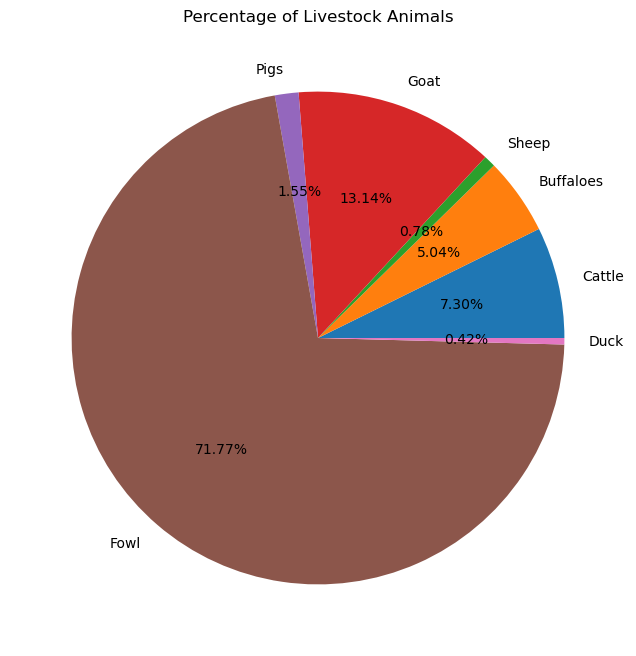

In [31]:
# Sum up the total count of each animal
total_counts = livestockPopn.sum()[2:]

# Calculate the percentage of each animal type
animal_percentages = 100 * total_counts / total_counts.sum()

# Create a new figure with a larger size
plt.figure(figsize=(8, 8))

# Generate a pie chart
plt.pie(animal_percentages, labels=animal_percentages.index, autopct='%1.2f%%')
plt.title('Percentage of Livestock Animals')

# Display the plot
plt.show()

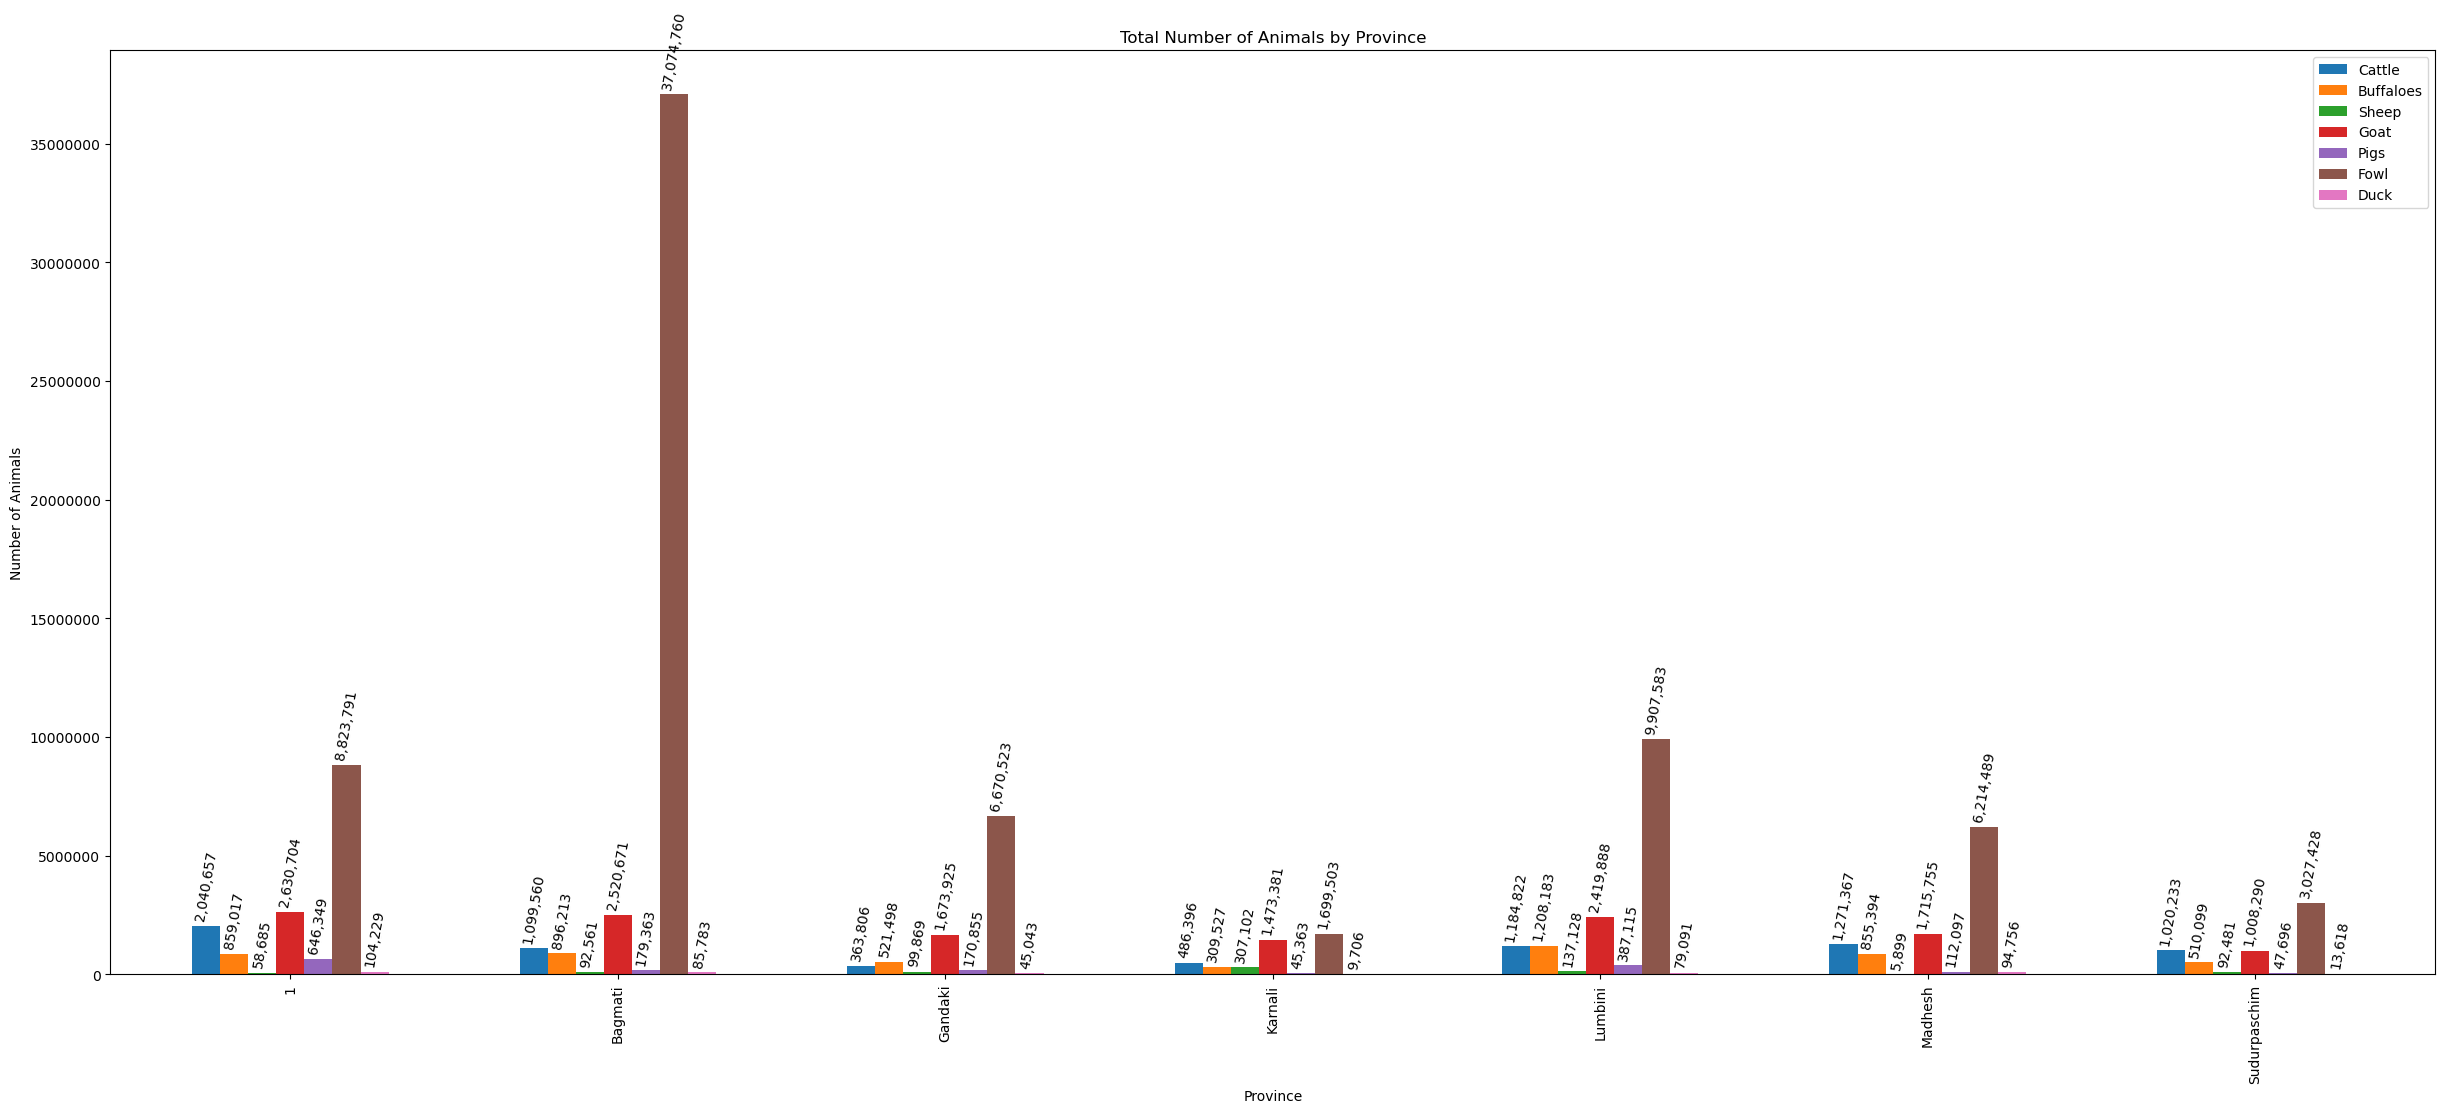

In [32]:
# Plot the total number of each type of animal in each province
ax = livestockPopn.groupby('Province')[['Cattle', 'Buffaloes', 'Sheep', 'Goat', 'Pigs', 'Fowl', 'Duck']].sum().plot(kind='bar',width=0.6,figsize=(30,12))
plt.title('Total Number of Animals by Province')
plt.xlabel('Province')
plt.ylabel('Number of Animals')
plt.ticklabel_format(style='plain', axis='y')

# Add text labels at the top of each bar
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{height:,.0f}', 
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', rotation=80)

plt.show()


In [33]:
import pandas as pd

# Group the data by province and sum the animal counts
animal_counts = livestockPopn.groupby('Province')[['Cattle', 'Buffaloes', 'Sheep', 'Goat', 'Pigs', 'Fowl', 'Duck']].sum()

# Reorder the rows in animal_counts to match the original dataset
animal_counts = animal_counts.reindex(livestockPopn['Province'].unique())

# Create a formatting function to highlight the minimum and maximum values in each row
def highlight_extrema(s):
    is_max = s == s.max()
    is_min = s == s.min()
    max_color = 'color: green'
    min_color = 'color: red'
    return [max_color if v else min_color if w else '' for v, w in zip(is_max, is_min)]

# Apply the formatting function to the animal counts table
animal_counts_formatted = animal_counts.style.apply(highlight_extrema)

# Display the formatted table
display(animal_counts_formatted)


,Cattle,Buffaloes,Sheep,Goat,Pigs,Fowl,Duck
Province,,,,,,,
1,2040657,859017,58685,2630704,646349,8823791,104229
Madhesh,1271367,855394,5899,1715755,112097,6214489,94756
Bagmati,1099560,896213,92561,2520671,179363,37074760,85783
Gandaki,363806,521498,99869,1673925,170855,6670523,45043
Lumbini,1184822,1208183,137128,2419888,387115,9907583,79091
Karnali,486396,309527,307102,1473381,45363,1699503,9706
Sudurpaschim,1020233,510099,92481,1008290,47696,3027428,13618


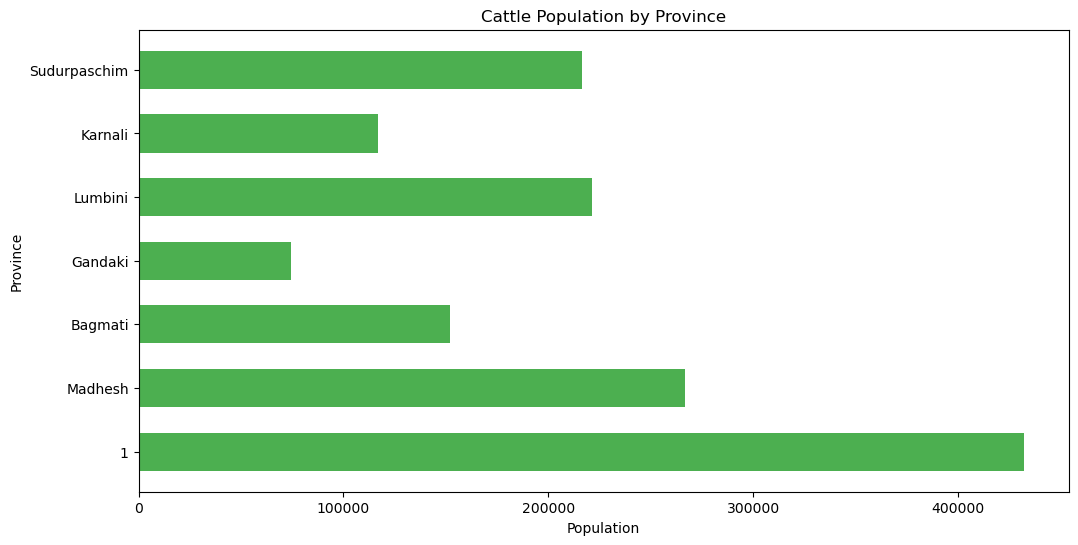

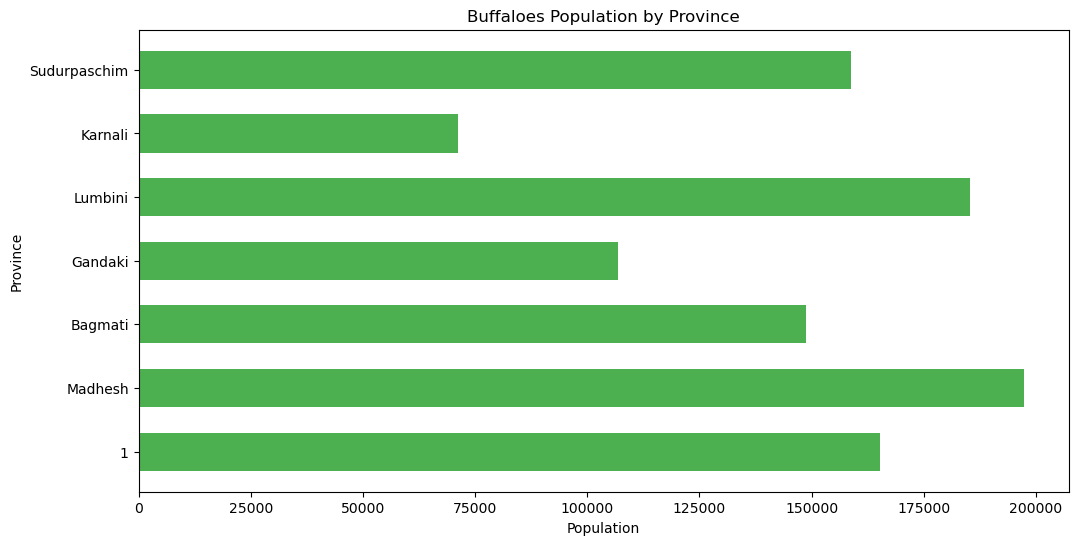

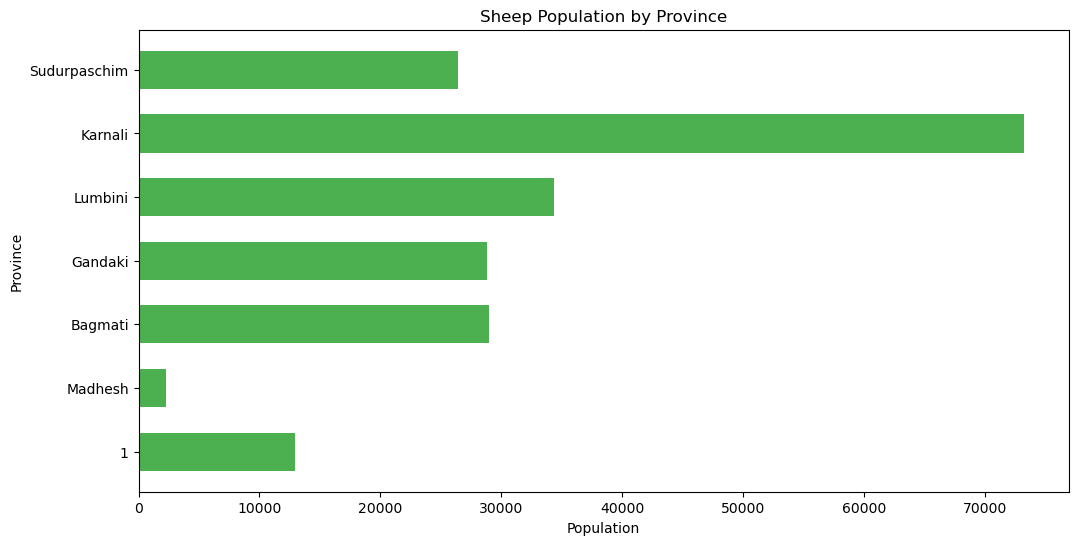

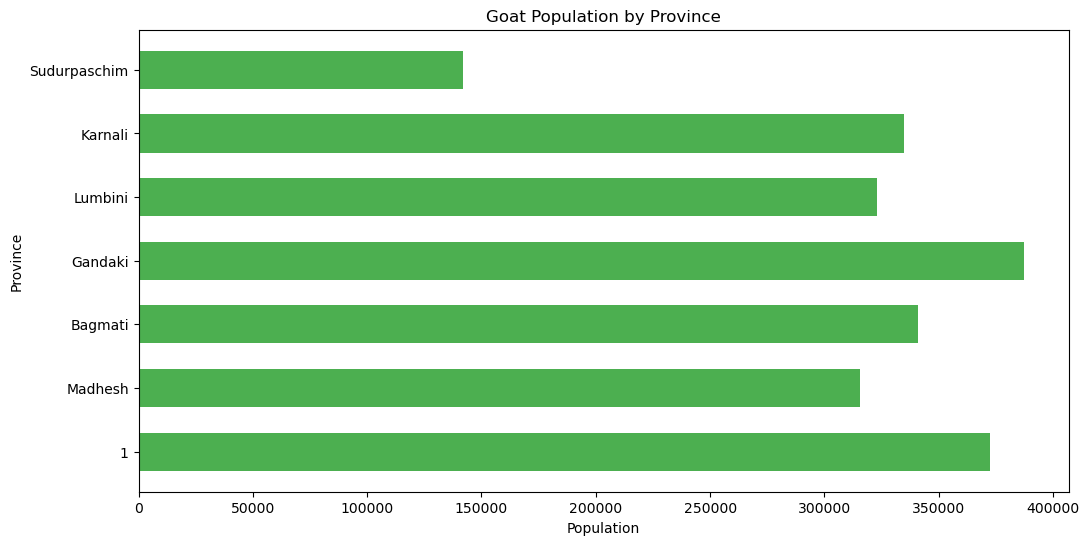

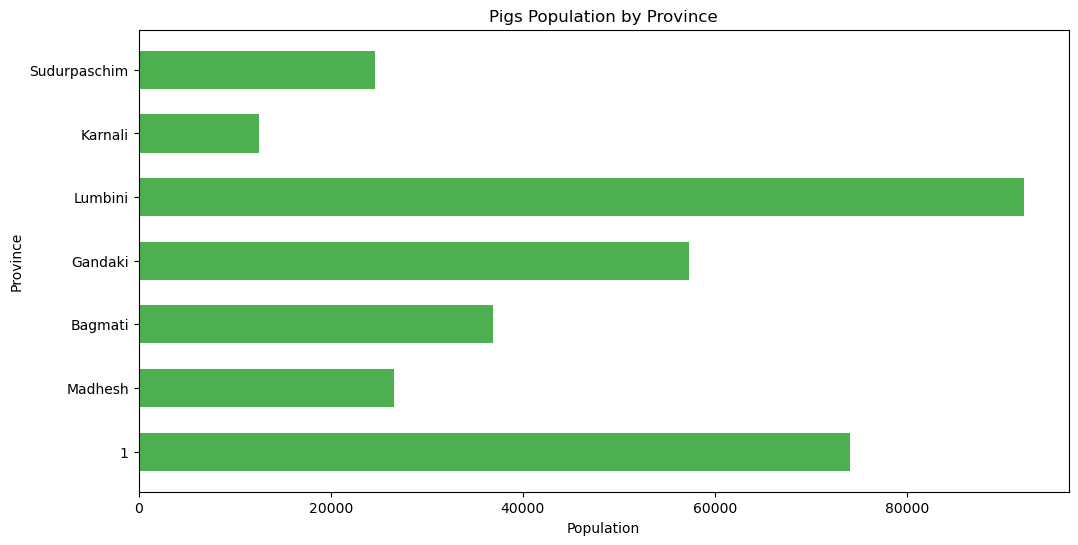

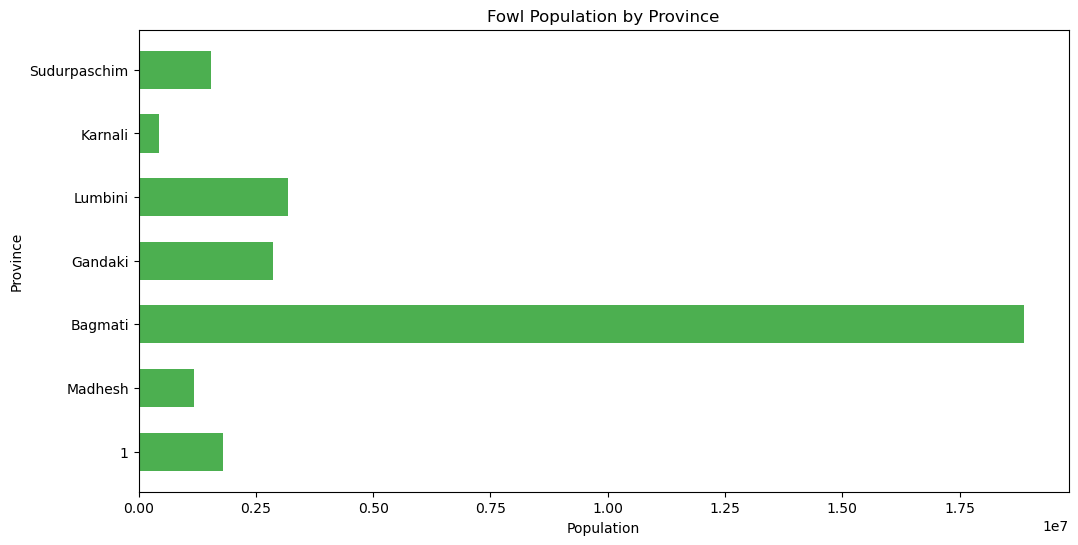

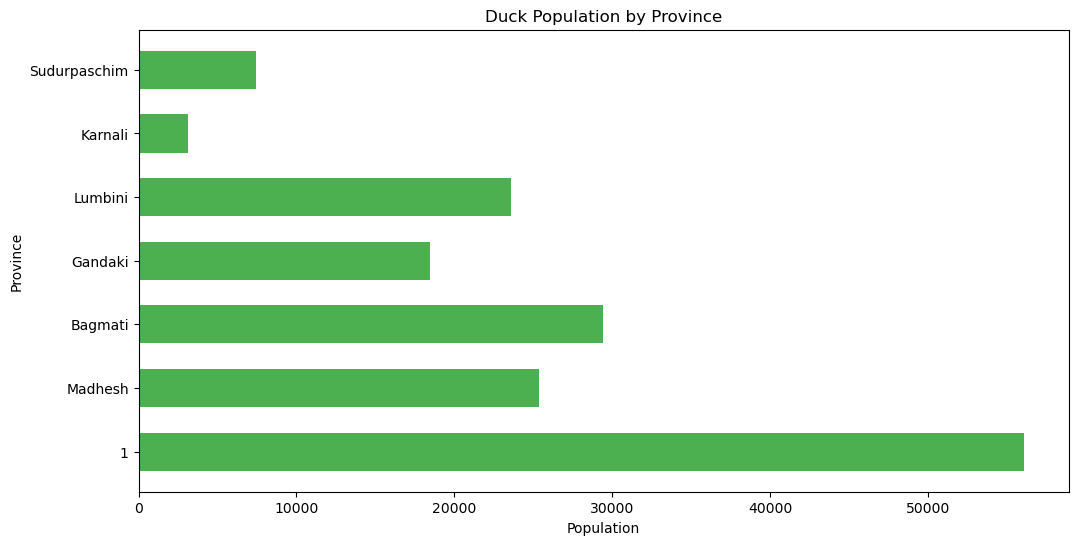

In [34]:
# plt.barh(livestockPopn.Province, livestockPopn.Cattle, color = "#4CAF50", height = 0.6)
animals = ['Cattle', 'Buffaloes', 'Sheep', 'Goat', 'Pigs', 'Fowl', 'Duck']
for animal in animals:
    plt.figure(figsize=(12, 6))
    plt.barh(livestockPopn.Province, livestockPopn[animal], color="#4CAF50", height=0.6)
    plt.title(f"{animal} Population by Province")
    plt.xlabel("Population")
    plt.ylabel("Province")
    plt.show()



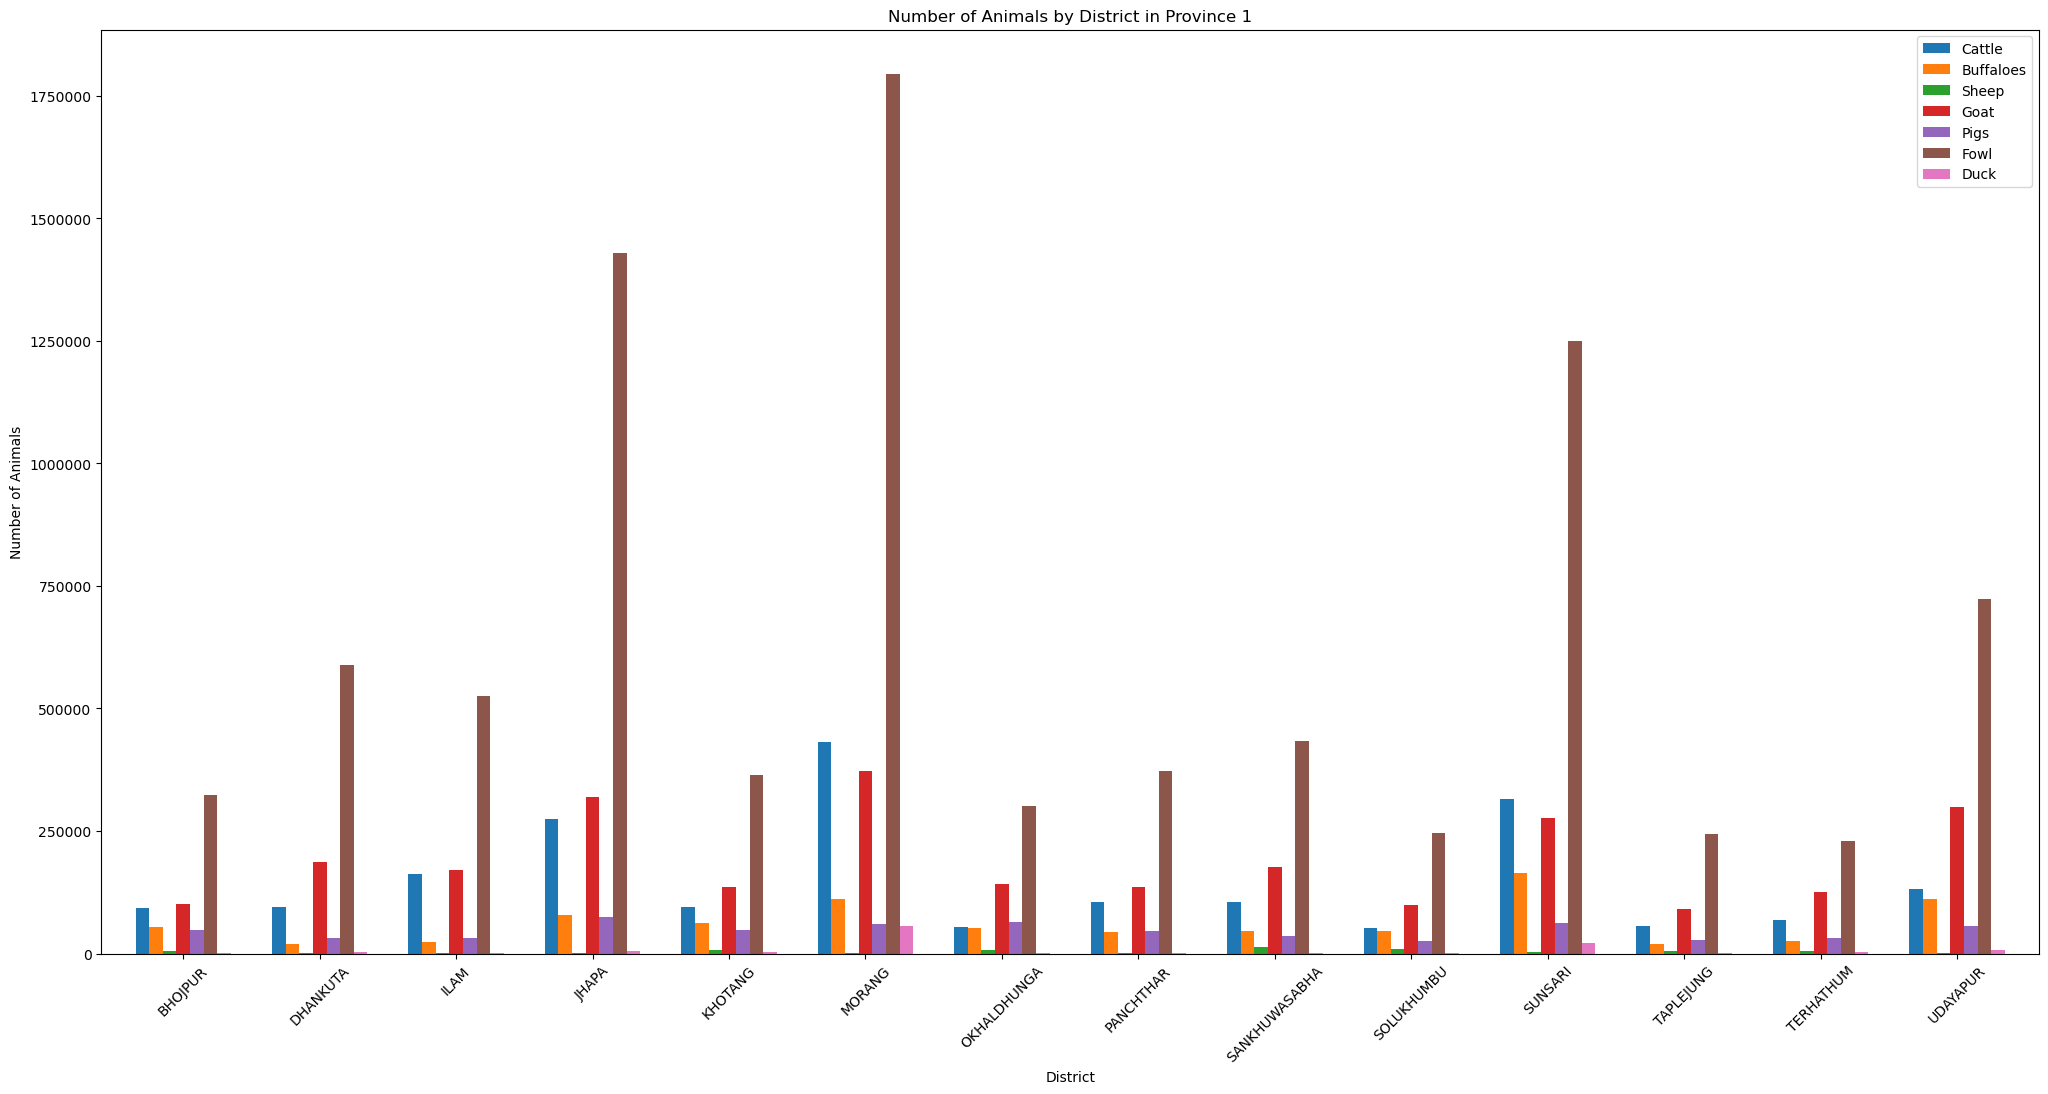

In [35]:
# Plot the number of each type of animal in each district of a particular province (here, province 1)
livestockPopn[livestockPopn['Province'] == '1'][['District', 'Cattle', 'Buffaloes', 'Sheep', 'Goat', 'Pigs', 'Fowl', 'Duck']].set_index('District').plot(kind='bar',width=0.7,figsize=(25,12))
plt.title('Number of Animals by District in Province 1')
plt.xlabel('District')
plt.ylabel('Number of Animals')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

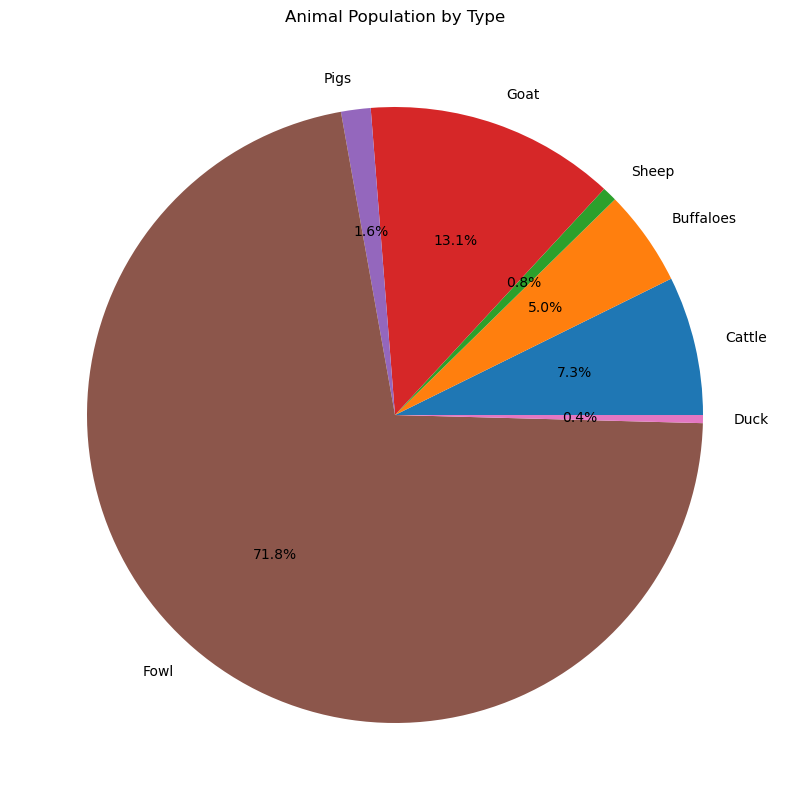

In [36]:
# Sum the animal population by type
animal_population = livestockPopn.iloc[:,2:].sum()

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(animal_population.values, labels=animal_population.index, autopct='%1.1f%%')
ax.set_title('Animal Population by Type')
plt.show()


In [37]:
# # create a list of land area values(sq.km) 
# Land_area = [1507, 892, 1703, 1606, 1591, 1855, 1074, 1241, 3480, 3312, 1257, 3646, 679, 2063, 1190, 1180, 1002, 1353, 1126, 1363, 1259, 1188, 119, 2218, 1926, 2191, 395, 1396, 385, 2426, 1121, 1546, 1544, 2491, 2542, 1784, 3610, 2017, 1692, 2246, 3573, 2297, 1043.1, 494, 1164, 1546, 1193, 2337, 2025, 2955, 1149, 1738, 634.88, 1373, 1309, 1879, 1161.13, 1360, 1502, 7889, 5655, 2230, 2531, 1741, 3535, 1213.49, 1462, 2451, 1680, 1519, 3422, 2188, 1538, 2322, 2025, 3235, 1610]

# # add the land area values as a new column to the dataframe
# livestockPopn['Land area'] = Land_area

In [38]:
livestock_cols = ['Cattle', 'Buffaloes', 'Sheep', 'Goat', 'Pigs', 'Fowl', 'Duck']
max_districts = {}

for col in livestock_cols:
    max_districts[col] = livestockPopn.loc[livestockPopn[col].idxmax()]['District']
    print(f"The district with the greatest number of {col.lower()} is: {max_districts[col]}")


The district with the greatest number of cattle is: MORANG
The district with the greatest number of buffaloes is: SAPTARI
The district with the greatest number of sheep is: JUMLA
The district with the greatest number of goat is: TANAHUN
The district with the greatest number of pigs is: DANG
The district with the greatest number of fowl is: CHITWAN
The district with the greatest number of duck is: MORANG


In [39]:
for col in livestock_cols:
    avg_animals_per_district = livestockPopn[col].mean()
    print(f"The average number of {col.lower()} per district is: {avg_animals_per_district}")


The average number of cattle per district is: 96971.96103896105
The average number of buffaloes per district is: 67012.09090909091
The average number of sheep per district is: 10308.116883116883
The average number of goat per district is: 174579.4025974026
The average number of pigs per district is: 20634.25974025974
The average number of fowl per district is: 953481.5194805195
The average number of duck per district is: 5613.324675324675


In [40]:
# Split the dataset into inputs (X) and output (y)
X = livestockPopn[['Sheep', 'Goat', 'Pigs', 'Fowl', 'Duck']].values
y = livestockPopn['Cattle'].values

# Create new features representing interactions between the existing variables
X_interactions = np.hstack([X, X[:, :2] * X[:, 3:]])

# Apply L2 regularization to the linear regression model
ridge = Ridge(alpha=0.1)
ridge.fit(X_interactions, y)

# Make predictions
predictions = ridge.predict(X_interactions)

# Combine actual and predicted values into a dataframe for easier comparison
results = pd.DataFrame({'Actual': y, 'Predicted': predictions})

# Print the first 10 rows
print(results.head(10))
# Calculate the R-squared score
accuracy = r2_score(y, predictions)

print("Accuracy: {:.2f}%".format(accuracy * 100))


   Actual      Predicted
0   92751   92285.152615
1   95805  107405.513369
2  161288   95362.695000
3  273501  185630.456380
4   95898  101582.325767
5  432314  468395.164095
6   54531  113453.390795
7  105450   98870.391767
8  106030   95520.095091
9   51755   70818.587192
Accuracy: 63.60%


### Is there a significant difference in the mean number of livestock across different provinces in Nepal?

In [41]:
# Define significance level
alpha = 0.05

# Perform one-way ANOVA test
result = stats.f_oneway(livestockPopn['Cattle'], livestockPopn['Buffaloes'], livestockPopn['Sheep'], livestockPopn['Goat'], livestockPopn['Pigs'], livestockPopn['Fowl'], livestockPopn['Duck'])

# Print the result
print("F-Statistic: ", result.statistic)
print("p-value: ", result.pvalue)

# Check if the p-value is less than the significance level alpha
if result.pvalue < alpha:
    print('There is a significant difference in the mean number of livestock across different provinces in Nepal at significance level of', alpha)
else:
    print('There is no significant difference in the mean number of livestock across different provinces in Nepal at significance level', alpha)


F-Statistic:  12.866836845907374
p-value:  1.3425040023728258e-13
There is a significant difference in the mean number of livestock across different provinces in Nepal at significance level of 0.05


<i>Null Hypothesis (H0): There is no significant difference in the mean number of livestock across different provinces in Nepal.<br>
Alternative Hypothesis (Ha): There is a significant difference in the mean number of livestock across different provinces in Nepal.

<i>In this statistical testing, I used an ANOVA test to determine whether to reject or fail to reject the null hypothesis based on the calculated p-value. After performing the ANOVA test, I had obtained a p-value of 1.3425040023728258e-13, which is much smaller than our chosen significance level of 0.05. This indicates that I have strong evidence to suggest that the mean number of livestock is significantly different across the provinces. Therefore, I had reject the null hypothesis and conclude that there is a significant difference in the mean number of livestock across different provinces in Nepal.

### Is there a significant difference in the mean number of cattle across the provinces in Nepal?

In [42]:
# Define significance level
alpha = 0.05

# Group by Province and select the column 'Cattle'
cattle_by_province = livestockPopn[['Province', 'Cattle']].groupby('Province')
# Perform one-way ANOVA test
f_stat, p_value = stats.f_oneway(*[group['Cattle'] for name, group in cattle_by_province])

# Print the result
print('F-statistic:', f_stat)
print('p-value:', p_value)

# Check if the p-value is less than the significance level alpha
if result.pvalue < alpha:
    print('There is a significant difference in the mean number of cattle across the provinces in Nepal at significance level of', alpha)
else:
    print('There is no significant difference in the mean number of cattle across the provinces in Nepal at significance level', alpha)

F-statistic: 5.440841732474904
p-value: 0.00011523486906817371
There is a significant difference in the mean number of cattle across the provinces in Nepal at significance level of 0.05


<i>Null Hypothesis (H0): There is no significant difference in the mean number of cattle across the provinces in Nepal.<br>
Alternative Hypothesis (Ha): There is a significant difference in the mean number of cattle across the provinces in Nepal.

<i>In this statistical testing, I used an ANOVA test to determine whether to reject or fail to reject the null hypothesis based on the calculated p-value. After performing the ANOVA test, I had obtained a p-value of 0.00011523486906817371, which is much smaller than our chosen significance level of 0.05. This indicates that I have strong evidence to suggest that the provinces have different mean numbers of cattle. Therefore, I had reject the null hypothesis and conclude that there is a significant difference in the mean number of cattle across different provinces in Nepal.

### Milk Production

In [43]:
# calculate the total milk produced by cows and buffaloes
cow_milk = milkAnimal['Cow Milk'].sum()
buffalo_milk = milkAnimal['Buffaloes Milk'].sum()

# calculate the total milk produced by all animals
total_milk = milkAnimal['Total Milk Produced'].sum()

# calculate the percentage of milk produced by cows and buffaloes
cow_percentage = (cow_milk / total_milk) * 100
buffalo_percentage = (buffalo_milk / total_milk) * 100

# print the results
print(f"Cows produce {cow_percentage:.2f}% of the total milk.")
print(f"Buffaloes produce {buffalo_percentage:.2f}% of the total milk.")

Cows produce 42.76% of the total milk.
Buffaloes produce 57.24% of the total milk.


In [44]:
from tabulate import tabulate

# Calculate the total number of cows and buffaloes
total_cows = milkAnimal['Milking Cows No.'].sum()
total_buffaloes = milkAnimal['Milking Buffaloes No.'].sum()

# Calculate the total number of cows and buffaloes
cows_milk_total = milkAnimal['Cow Milk'].sum()
buffaloes_milk_total = milkAnimal['Buffaloes Milk'].sum()

# Compute the overall average milk production per cow and buffalo individual
overall_avg_milk_per_cow = cows_milk_total/total_cows
overall_avg_milk_per_buffalo = buffaloes_milk_total/total_buffaloes

# Create a table with the results
table = [['Cow', f'{total_cows:,.0f}', f'{cows_milk_total:,.2f}',f'{overall_avg_milk_per_cow:,.2f}'],
         ['Buffalo', f'{total_buffaloes:,.0f}', f'{buffaloes_milk_total:,.2f}',f'{overall_avg_milk_per_buffalo:,.2f}']]

# Print the table
print(tabulate(table, headers=['Animal', 'Total number/year', 'Total milk production/year(in mt)','Average milk (in mt)']))


Animal    Total number/year    Total milk production/year(in mt)      Average milk (in mt)
--------  -------------------  -----------------------------------  ----------------------
Cow       1,209,041            1,060,488.00                                           0.88
Buffalo   1,630,642            1,419,410.00                                           0.87


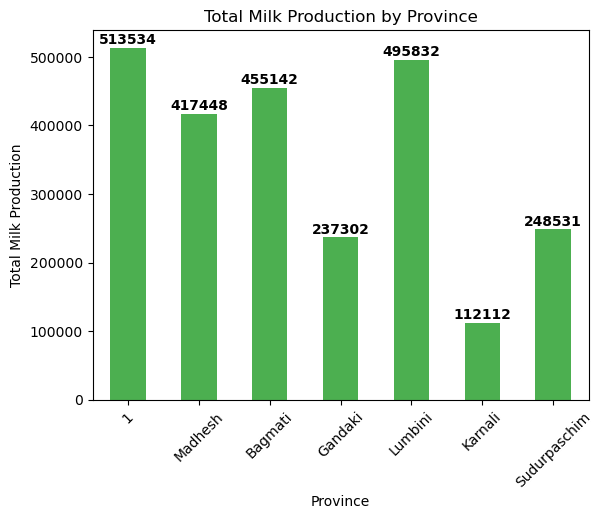

In [45]:
# Define the order of the provinces based on the order they appear in the dataset
province_order = milkAnimal['Province'].unique().tolist()

# Convert the Province column to a categorical variable with the same ordering as the original dataset
milkAnimal['Province'] = pd.Categorical(milkAnimal['Province'], categories=province_order, ordered=True)

# Visualize the total milk production by province
total_milk_by_province = milkAnimal.groupby('Province')['Total Milk Produced'].sum()
ax = total_milk_by_province.plot(kind='bar', color="#4CAF50")
plt.title('Total Milk Production by Province')
plt.xlabel('Province')
plt.ylabel('Total Milk Production')
plt.xticks(rotation=45)

# Add labels to the top of each bar
for i, v in enumerate(total_milk_by_province):
    ax.text(i, v + 1000, str(v), color='black', fontweight='bold', ha='center', va='bottom')

plt.show()


In [46]:
total_milk_by_province = milkAnimal.groupby('Province')['Total Milk Produced'].sum()
table = pd.DataFrame({'Province': total_milk_by_province.index, 'Total Milk Production': total_milk_by_province.values})
table = table.sort_values(by='Total Milk Production', ascending=False)
table = table.reset_index(drop=True)
table.index += 1
table.index.name = 'Rank'
print(table)

          Province  Total Milk Production
Rank                                     
1                1                 513534
2          Lumbini                 495832
3          Bagmati                 455142
4          Madhesh                 417448
5     Sudurpaschim                 248531
6          Gandaki                 237302
7          Karnali                 112112


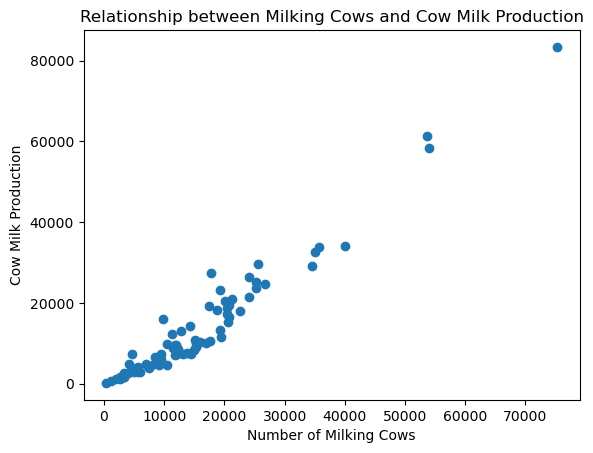

In [47]:
# creating a scatter plot to visualize the relationship between the number of milking cows and the amount of cow milk produced
plt.scatter(milkAnimal['Milking Cows No.'], milkAnimal['Cow Milk'])
plt.title('Relationship between Milking Cows and Cow Milk Production')
plt.xlabel('Number of Milking Cows')
plt.ylabel('Cow Milk Production')
plt.show()


Text(0.5, 1.0, 'Relationship between Milking Buffaloes and Buffalo Milk Production')

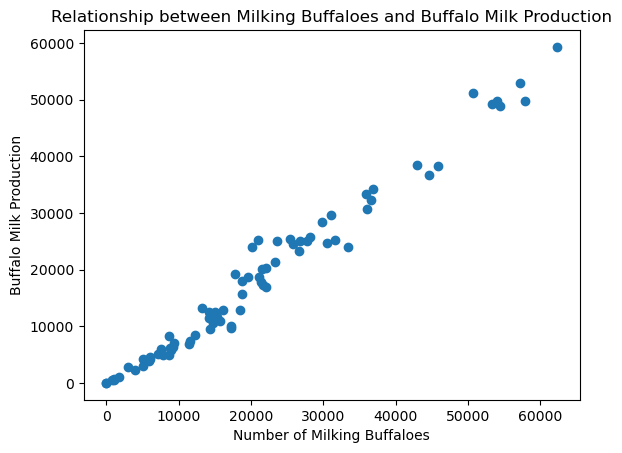

In [48]:
# Create a scatter plot showing the relationship between the number of milking buffaloes and the amount of buffalo milk produced
plt.scatter(milkAnimal['Milking Buffaloes No.'], milkAnimal['Buffaloes Milk'])
plt.xlabel('Number of Milking Buffaloes')
plt.ylabel('Buffalo Milk Production')
plt.title('Relationship between Milking Buffaloes and Buffalo Milk Production')

/var/folders/4k/q3brjphn30j64d19rjzmmmf40000gn/T/ipykernel_1342/1308147399.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(milkAnimal.corr(), annot=True, cmap='coolwarm')


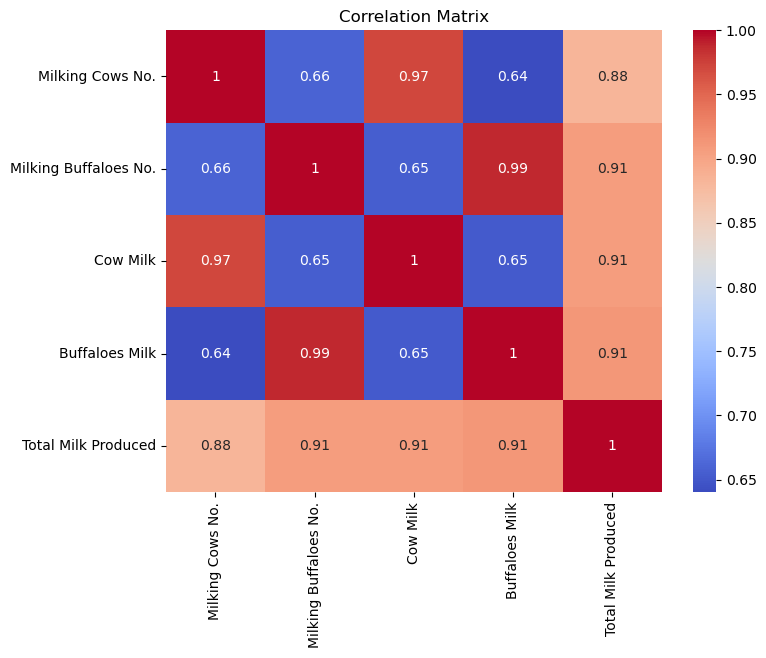

In [49]:
# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(milkAnimal.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

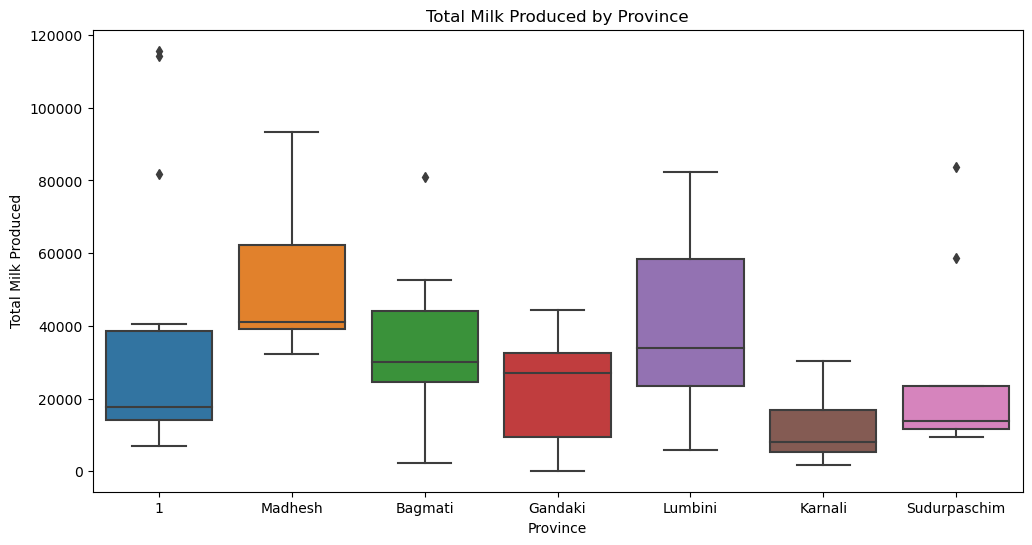

In [50]:
# Box plot of total milk produced by province
plt.figure(figsize=(12, 6))
sns.boxplot(x='Province', y='Total Milk Produced', data=milkAnimal)
plt.title('Total Milk Produced by Province')
plt.show()

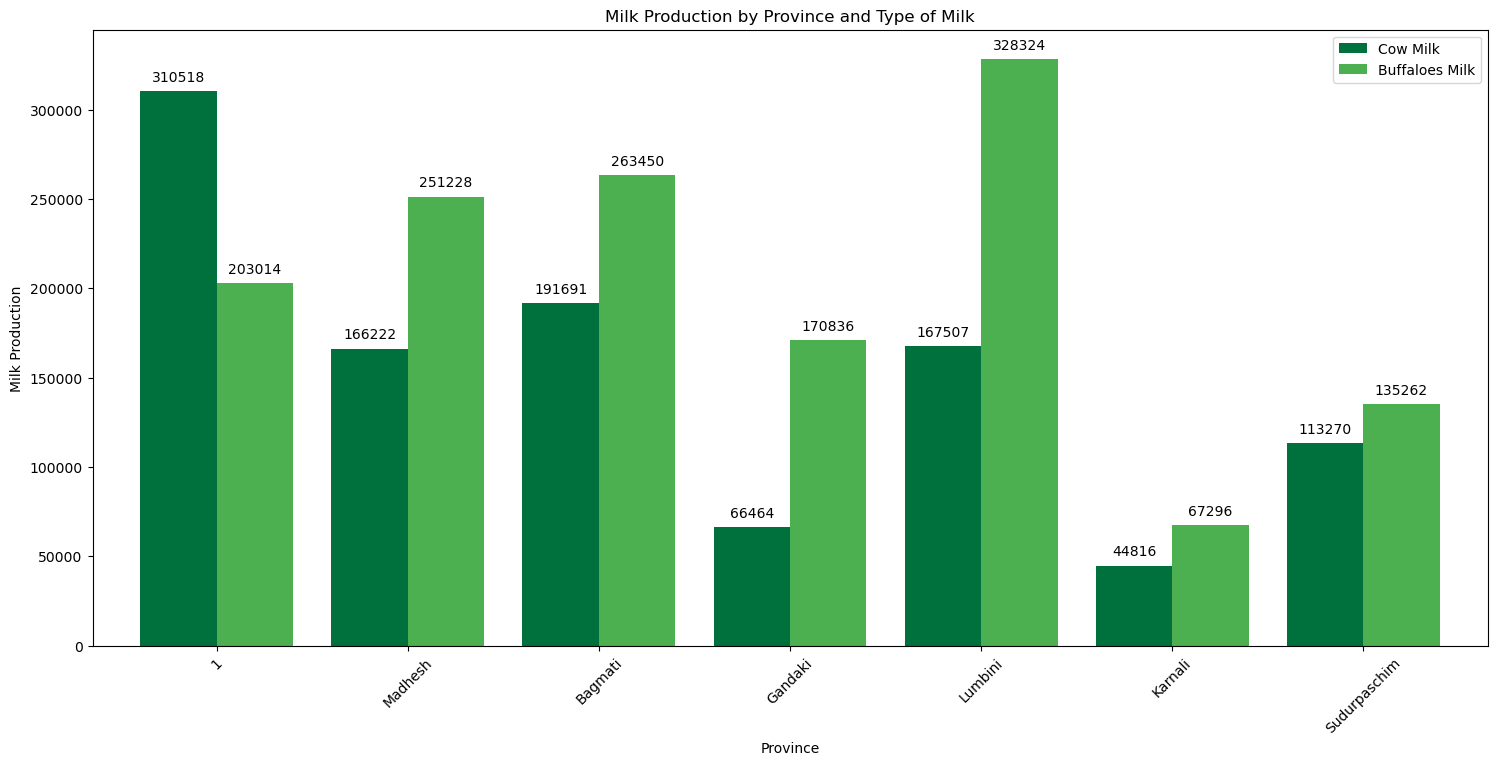

In [51]:
# Group the data by province and calculate the total milk production for each type of milk
ax = milkAnimal.groupby('Province')[["Cow Milk", "Buffaloes Milk"]].sum().plot(kind='bar', width=0.8, figsize=(18,8), color=['#00703C', '#4CAF50'])
ax.set_title('Milk Production by Province and Type of Milk')
ax.set_xlabel('Province')
ax.set_ylabel('Milk Production')
ax.set_xticklabels(milkAnimal['Province'].unique().tolist(), rotation=45)

# Add text labels at the top of each bar
for rect in ax.containers:
    ax.bar_label(rect, label_type='edge', fontsize=10, padding=5)

plt.show()


/Users/saramshkhadka/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


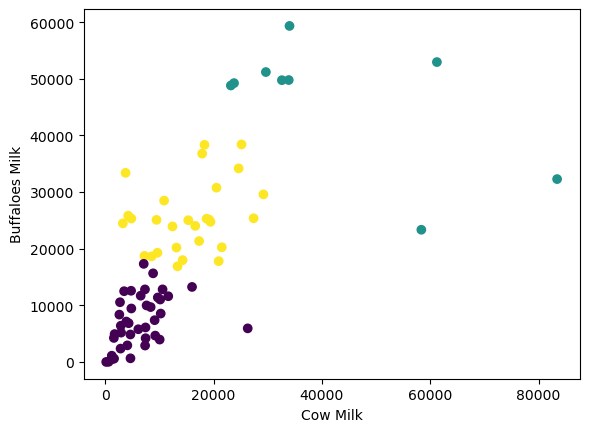

   District         Milk Production
0   BHOJPUR     Low Milk Production
1  DHANKUTA     Low Milk Production
2      ILAM     Low Milk Production
3     JHAPA  Medium Milk Production
4   KHOTANG     Low Milk Production
Low Milk Production       40
High Milk Production      28
Medium Milk Production     9
Name: Milk Production, dtype: int64


In [52]:
# Define the number of clusters and the cluster names
n_clusters = 3
cluster_names = {
    0: 'Low Milk Production',
    1: 'Medium Milk Production',
    2: 'High Milk Production'
}

# Perform K-means clustering to group provinces based on their milk production characteristics
X = milkAnimal[['Cow Milk', 'Buffaloes Milk']]
kmeans = KMeans(n_clusters=n_clusters).fit(X)
labels = kmeans.labels_
milkAnimal['cluster'] = labels

# Add a column with cluster names to the milkAnimal dataframe
milkAnimal['Milk Production'] = milkAnimal['cluster'].map(cluster_names)

# Plot the data points colored by their cluster labels
plt.scatter(X['Cow Milk'], X['Buffaloes Milk'], c=labels)
plt.xlabel('Cow Milk')
plt.ylabel('Buffaloes Milk')
plt.show()

#pd.set_option('display.max_rows', None)

# Print a table with district names and their corresponding cluster
print(milkAnimal[['District', 'Milk Production']].head())

# Count the number of districts in each cluster
cluster_counts = milkAnimal['Milk Production'].value_counts()
# Print the results
print(cluster_counts)


In [53]:
# Define the quartiles
Q1 = milkAnimal['Cow Milk'].quantile(0.25)
Q2 = milkAnimal['Cow Milk'].quantile(0.5)
Q3 = milkAnimal['Cow Milk'].quantile(0.75)

# Define the function to assign clusters based on quartiles
def milk_cluster(x):
    if x <= Q1:
        return 'Low Milk Production'
    elif x <= Q2:
        return 'Medium Milk Production'
    else:
        return 'High Milk Production'

# Create a new column 'Milk Production' based on the cluster function
milkAnimal['Milk Production'] = milkAnimal['Cow Milk'].apply(milk_cluster)

# Print a table with district names and their corresponding cluster
print(milkAnimal[['District', 'Milk Production']].head())

#pd.set_option('display.max_rows', None)

# Count the number of districts in each cluster
cluster_counts = milkAnimal['Milk Production'].value_counts()
# Print the results
print(cluster_counts)

   District         Milk Production
0   BHOJPUR  Medium Milk Production
1  DHANKUTA    High Milk Production
2      ILAM    High Milk Production
3     JHAPA    High Milk Production
4   KHOTANG  Medium Milk Production
High Milk Production      38
Low Milk Production       20
Medium Milk Production    19
Name: Milk Production, dtype: int64


In [54]:
# calculate the Pearson's correlation coefficient between number of milking cows and milk production
cow_corr = milkAnimal['Milking Cows No.'].corr(milkAnimal['Cow Milk'], method='pearson')
print('Pearson\'s correlation coefficient between number of milking cows and Cow milk production:', cow_corr)

# calculate the Pearson's correlation coefficient between number of milking buffaloes and buffalo milk production
buffalo_corr = milkAnimal['Milking Buffaloes No.'].corr(milkAnimal['Buffaloes Milk'], method='pearson')
print('Pearson\'s correlation coefficient between number of milking buffaloes and buffalo milk production:', buffalo_corr)


Pearson's correlation coefficient between number of milking cows and Cow milk production: 0.9708976175716161
Pearson's correlation coefficient between number of milking buffaloes and buffalo milk production: 0.9875119977173982


In this case, the Pearson's correlation coefficient between the number of milking cows and milk production is 0.9709, which indicates a very strong positive linear relationship between these two variables. This means that as the number of milking cows increases, the amount of milk production also increases. The correlation is almost perfect, which means that the relationship is very strong and highly significant.

Similarly, the Pearson's correlation coefficient between the number of milking buffaloes and buffalo milk production is 0.9875, which also indicates a very strong positive linear relationship between these two variables. This means that as the number of milking buffaloes increases, the amount of buffalo milk production also increases. The correlation is almost perfect, which means that the relationship is very strong and highly significant.

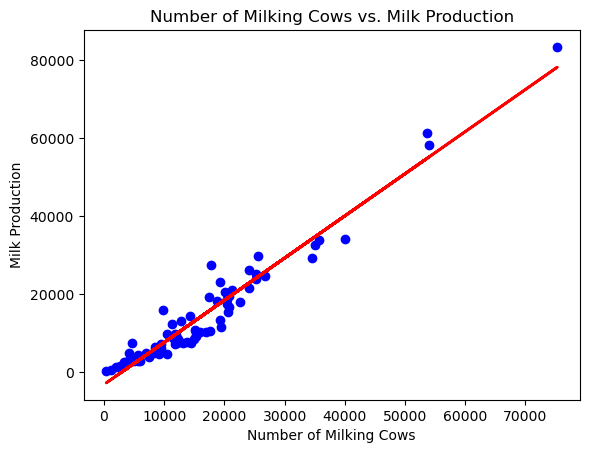

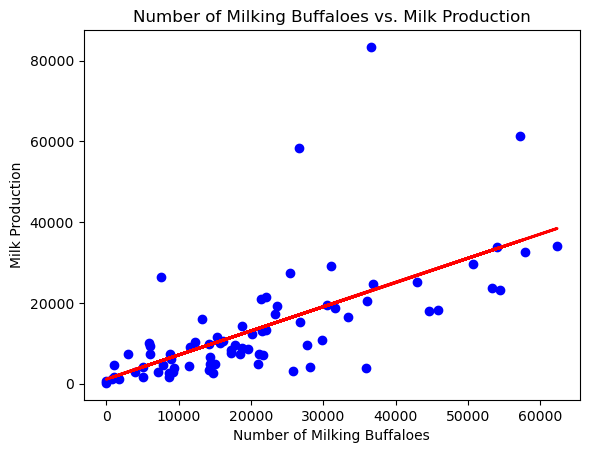

In [55]:

from sklearn.linear_model import LinearRegression

# create a simple linear regression model for cows
X_cow = milkAnimal[['Milking Cows No.']]
y_milk = milkAnimal['Cow Milk']
reg_cow = LinearRegression().fit(X_cow, y_milk)

# create a simple linear regression model for buffaloes
X_buffalo = milkAnimal[['Milking Buffaloes No.']]
reg_buffalo = LinearRegression().fit(X_buffalo, y_milk)

# plot the data points and regression lines
plt.scatter(X_cow, y_milk, color='blue')
plt.plot(X_cow, reg_cow.predict(X_cow), color='red', linewidth=2)
plt.title('Number of Milking Cows vs. Milk Production')
plt.xlabel('Number of Milking Cows')
plt.ylabel('Milk Production')
plt.show()

plt.scatter(X_buffalo, y_milk, color='blue')
plt.plot(X_buffalo, reg_buffalo.predict(X_buffalo), color='red', linewidth=2)
plt.title('Number of Milking Buffaloes vs. Milk Production')
plt.xlabel('Number of Milking Buffaloes')
plt.ylabel('Milk Production')
plt.show()



In [56]:
# Select relevant features
X = milkAnimal[['Milking Cows No.']].values

# Select target variable
y = milkAnimal[['Cow Milk']].values

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Predict cow milk production based on milking cow number
predicted_milk = model.predict([[10000]])

# Calculate milk produced per cow in metric tons
milk_per_cow_mt = predicted_milk[0][0] / 10000

# Convert milk produced per cow from metric tons to liters
milk_per_cow_ltr = milk_per_cow_mt * 1000

# Print the predicted value
print(f"Predicted milk production per cow in one year: {milk_per_cow_ltr:.2f} liters")


Predicted milk production per cow in one year: 760.55 liters


In [57]:
# Select relevant features
X = milkAnimal[['Milking Buffaloes No.']].values

# Select target variable
y = milkAnimal[['Buffaloes Milk']].values

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Predict buffalo milk production based on milking buffalo number
predicted_milk = model.predict([[5000]])

# Calculate milk produced per buffalo in metric tons
milk_per_buffalo_mt = predicted_milk[0][0] / 5000

# Convert milk produced per buffalo from metric tons to liters
milk_per_buffalo_ltr = milk_per_buffalo_mt * 1000

# Print the predicted value
print(f"Predicted milk production per buffalo in one year: {milk_per_buffalo_ltr:.2f} liters")


Predicted milk production per buffalo in one year: 661.56 liters


### Meat Production

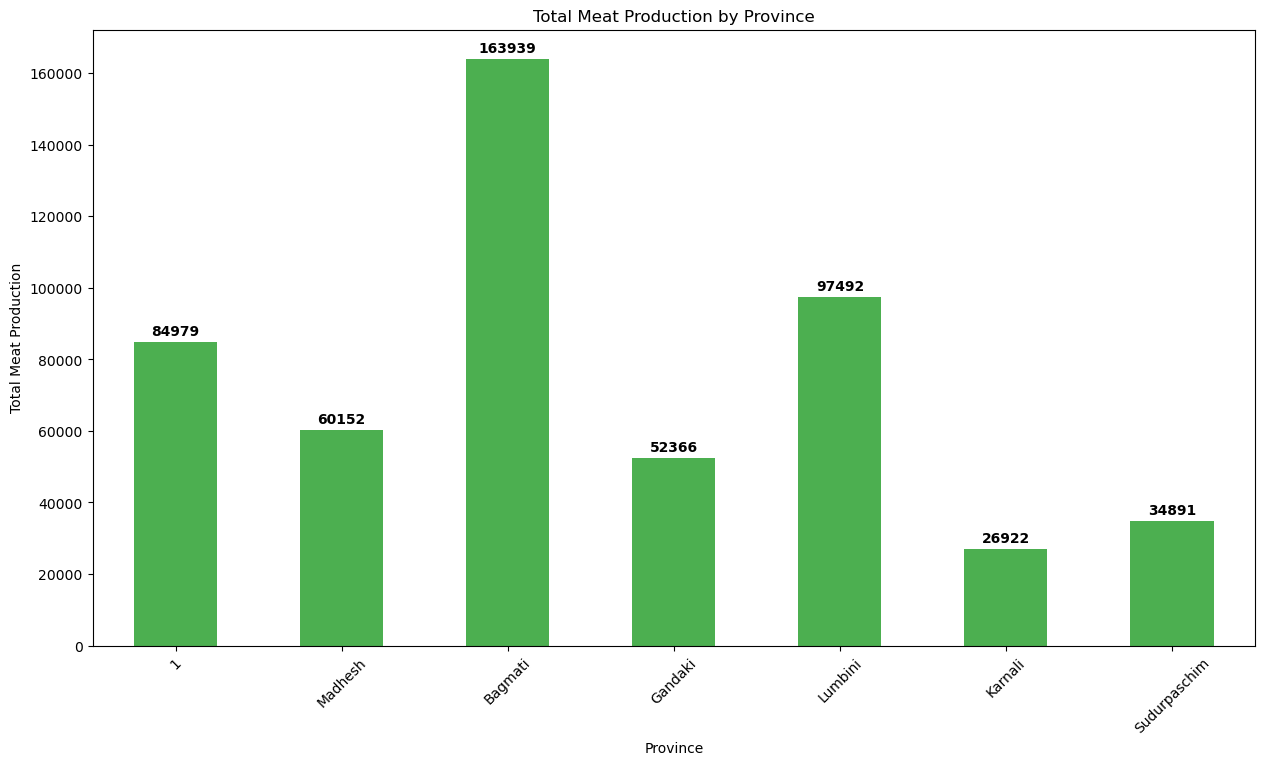

In [58]:
# Define the order of the provinces based on the order they appear in the dataset
province_order = meatProd['Province'].unique().tolist()

# Convert the Province column to a categorical variable with the same ordering as the original dataset
meatProd['Province'] = pd.Categorical(meatProd['Province'], categories=province_order, ordered=True)

# Visualize the total milk production by province
total_meat_by_province = meatProd.groupby('Province')['Total Meat'].sum()
ax = total_meat_by_province.plot(kind='bar', figsize=(15,8), color="#4CAF50")
plt.title('Total Meat Production by Province')
plt.xlabel('Province')
plt.ylabel('Total Meat Production')
plt.xticks(rotation=45)

# Add labels to the top of each bar
for i, v in enumerate(total_meat_by_province):
    ax.text(i, v + 1000, str(v), color='black', fontweight='bold', ha='center', va='bottom')

plt.show()


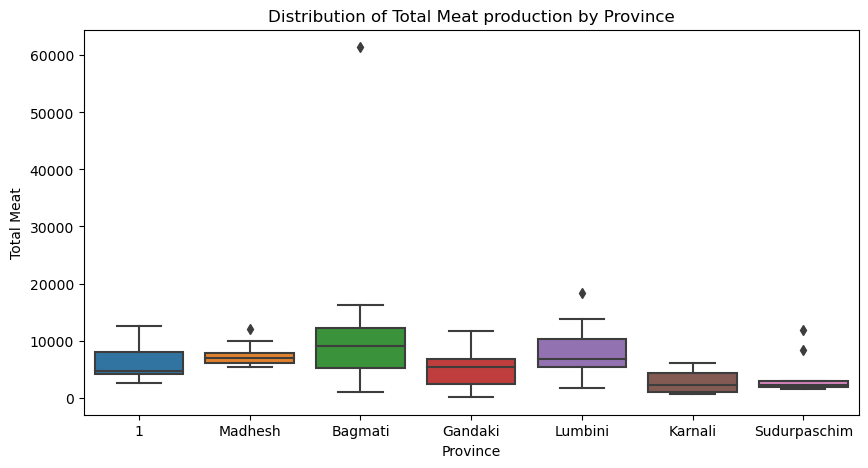

In [59]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Province', y='Total Meat', data=meatProd)
plt.title('Distribution of Total Meat production by Province')
plt.show()

In [60]:
# Group the data by province and sum up the livestock animals for each province
#province_data = livestockPopn.groupby(['Province']).sum()

province_data = meatProd.groupby(['Province'], as_index=False)[['Buff', 'Mutton','Chevon', 'Pork','Chicken','Duck']].sum()


# Remove the district column from the data
#province_data = province_data.drop(columns=['District'])

# Print the province data in tabular form
print(province_data.to_string(index=False))

    Province  Buff  Mutton  Chevon  Pork  Chicken  Duck
           1 30167     220   13846 12793    27831   120
     Madhesh 29129      23    9030  2220    19657    92
     Bagmati 33344     344   13268  3550   113346    84
     Gandaki 19315     375    8811  3383    20444    44
     Lumbini 45509     512   12737  7663    30993    78
     Karnali 11684    1147    7754   898     5432    10
Sudurpaschim 19025     345    5308   944     9259    11


In [61]:
# Get the sum of each animal across all provinces and districts
animal_totals = livestockPopn.agg({'Cattle': 'sum', 'Buffaloes': 'sum', 'Sheep': 'sum',
                        'Goat': 'sum', 'Pigs': 'sum', 'Fowl': 'sum', 'Duck': 'sum'})

# Print the totals for each animal
for animal, total in animal_totals.items():
    print("Total {}: {}".format(animal, total))

Total Cattle: 7466841
Total Buffaloes: 5159931
Total Sheep: 793725
Total Goat: 13442614
Total Pigs: 1588838
Total Fowl: 73418077
Total Duck: 432226


In [62]:
# merge the datasets on the district column
meatMilk = pd.merge(meatProd, milkAnimal, on='District')

# Drop the duplicate "Province_y" column and rename the "Province_x" column to "Province"
meatMilk = meatMilk.drop(columns=["Province_y"])
meatMilk = meatMilk.rename(columns={"Province_x": "Province"})

#pd.set_option('display.max_rows', None)

print(meatMilk.head())

  Province  District  Buff  Mutton  Chevon  Pork  Chicken  Duck  Total Meat  \
0        1   BHOJPUR  1923      23     535   956     1095     2        4534   
1        1  DHANKUTA   680       2     984   646     1956     4        4273   
2        1      ILAM   837       1     894   629     1634     1        3996   
3        1     JHAPA  2739       0    1684  1465     4308     5       10202   
4        1   KHOTANG  2215      23     711   966     1195     2        5113   

   Milking Cows No.  Milking Buffaloes No.  Cow Milk  Buffaloes Milk  \
0             15026                  17251      8373            9686   
1             15273                   5922     10040            3946   
2             24032                   7577     26292            5927   
3             54000                  26610     58345           23339   
4             13809                  17280      7623            9975   

   Total Milk Produced  cluster         Milk Production  
0                18059        0  M

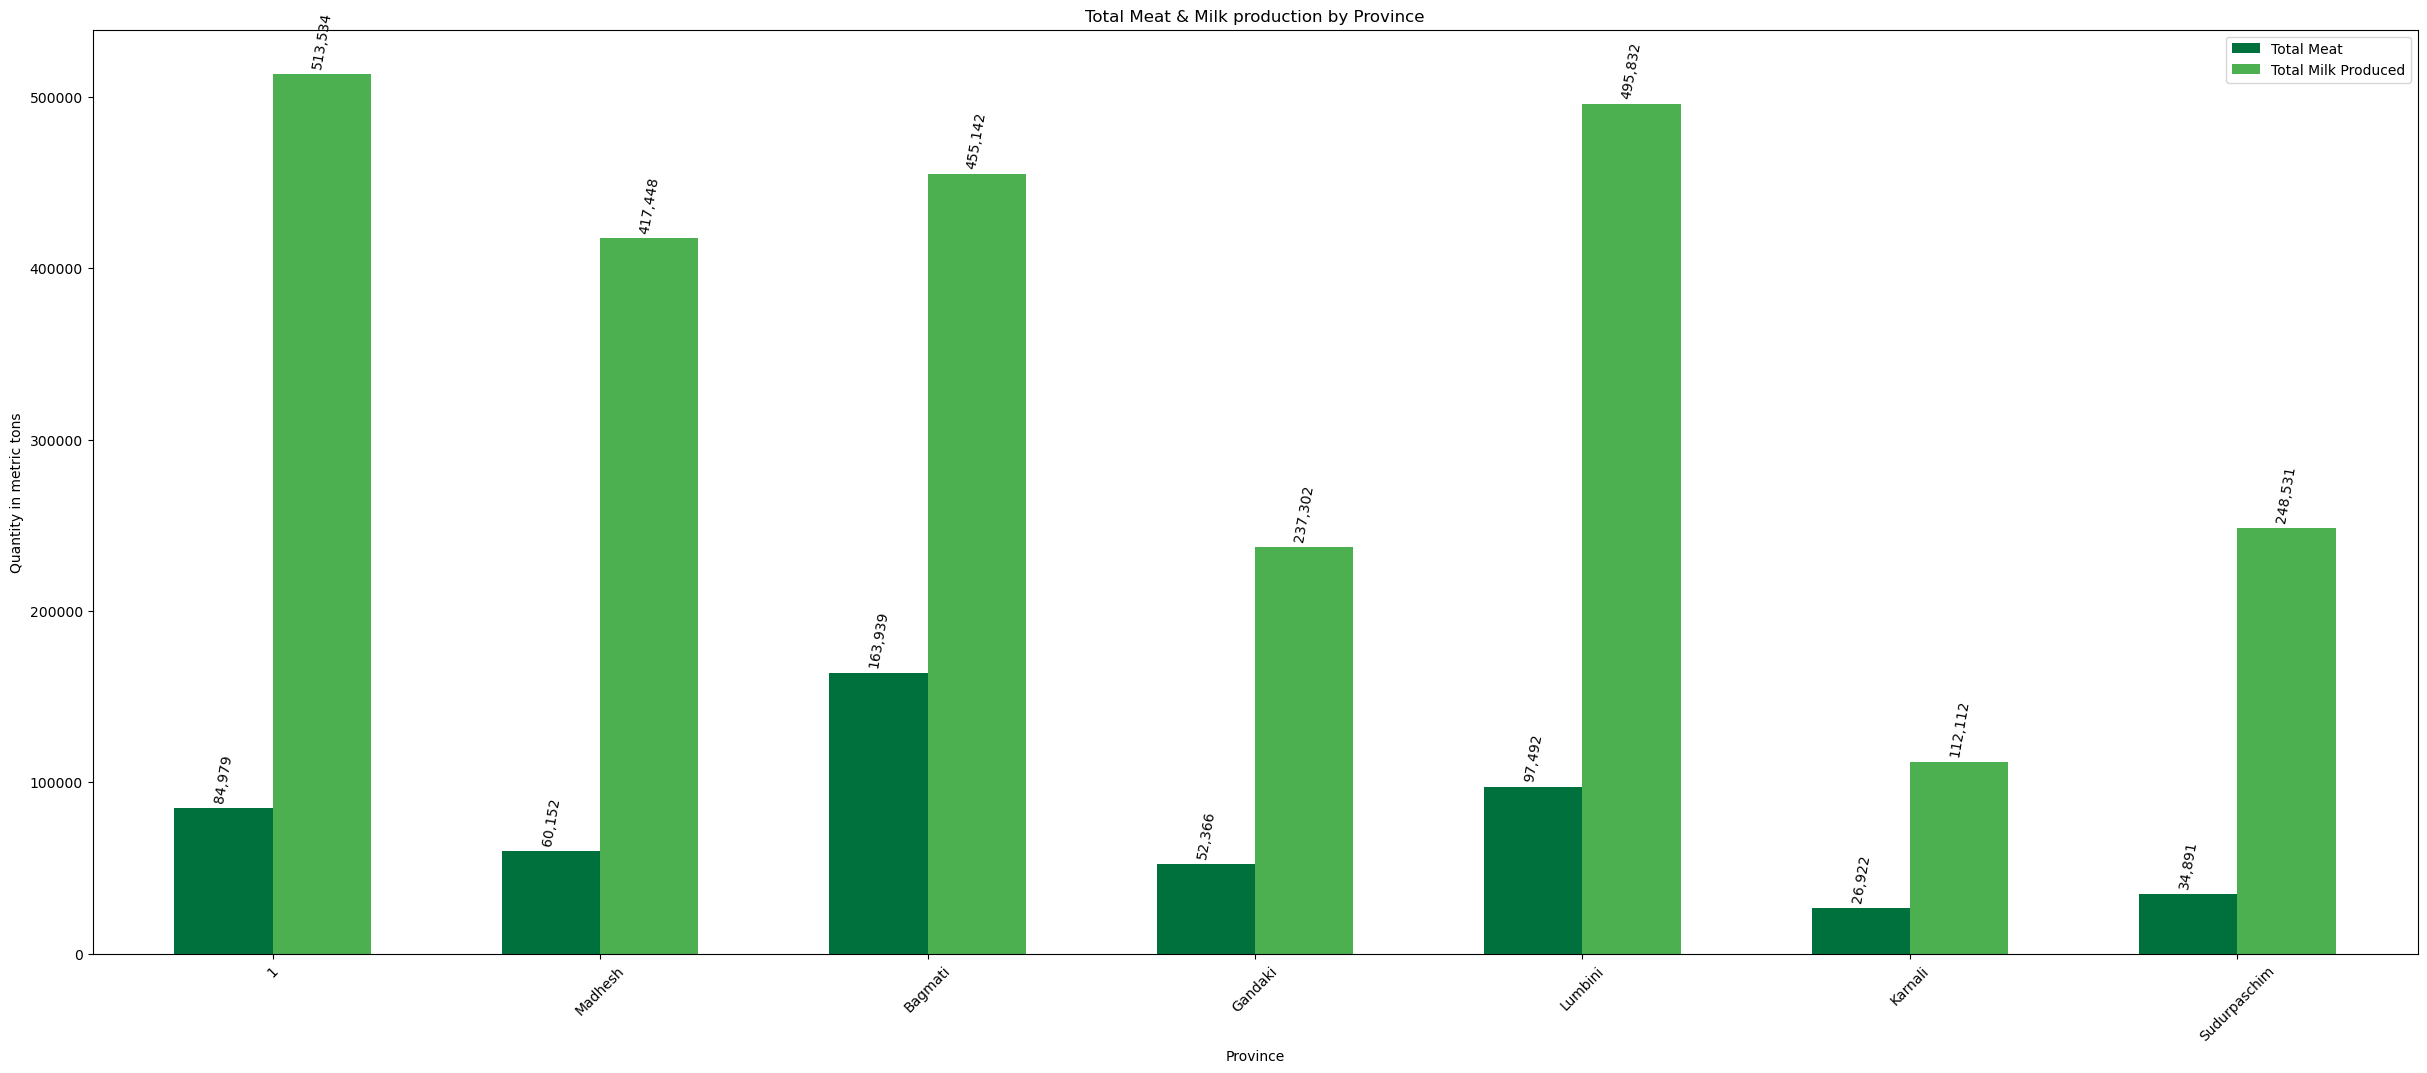

In [63]:
# Plot the total number of each type of animal in each province
ax = meatMilk.groupby('Province')[['Total Meat', 'Total Milk Produced']].sum().plot(kind='bar',width=0.6,figsize=(30,12), color=['#00703C', '#4CAF50'])
plt.title('Total Meat & Milk production by Province')
plt.xlabel('Province')
plt.ylabel('Quantity in metric tons')
plt.ticklabel_format(style='plain', axis='y')
ax.set_xticklabels(meatMilk['Province'].unique().tolist(), rotation=45)

# Add text labels at the top of each bar
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{height:,.0f}', 
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', rotation=80)

plt.show()

### Egg production

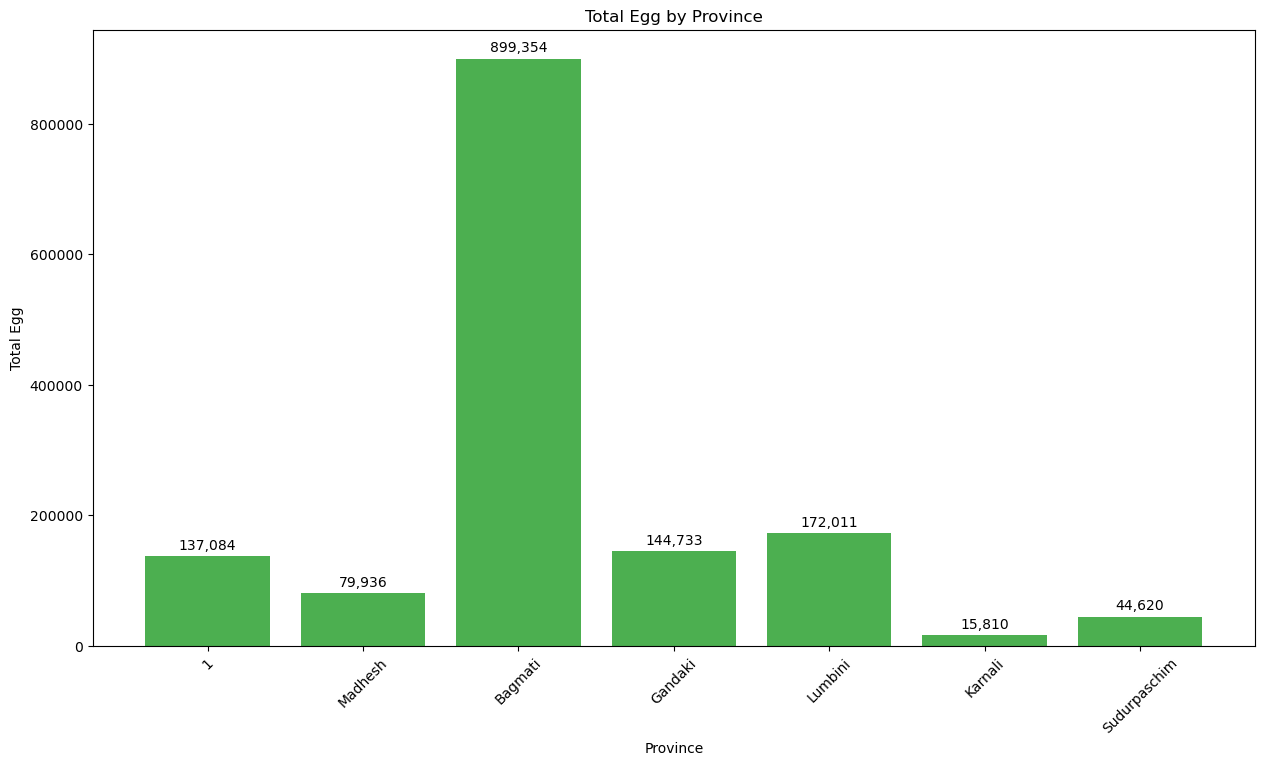

In [64]:
# define the order of provinces in the dataset
province_order = ["1","Madhesh", "Bagmati", "Gandaki", "Lumbini", "Karnali", "Sudurpaschim"]

# group by Province and sum Total Egg
total_egg_by_province = eggProd.groupby('Province')['Total Egg'].sum()

# sort the grouped data by the original order of provinces in the dataset
total_egg_by_province = total_egg_by_province[province_order]

# plot the bar graph
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(total_egg_by_province.index, total_egg_by_province.values, color = '#4CAF50')
ax.set_xlabel('Province')
ax.set_ylabel('Total Egg')
ax.set_title('Total Egg by Province')
ax.set_xticks(total_egg_by_province.index)
ax.set_xticklabels(total_egg_by_province.index, rotation=45)

# Add text labels at the top of each bar
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{height:,.0f}', 
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', rotation=0)

plt.show()

In [65]:
total_hen_eggs = eggProd['Hen Egg'].sum()
total_duck_eggs = eggProd['Duck Egg'].sum()
total_eggs = total_hen_eggs + total_duck_eggs

percent_hen_eggs = (total_hen_eggs / total_eggs) * 100
percent_duck_eggs = (total_duck_eggs / total_eggs) * 100

print(f"Total egg production from hens: {total_hen_eggs:,}")
print(f"Total egg production from ducks: {total_duck_eggs:,}")
print(f"Total egg production: {total_eggs:,}")
print(f"Percentage of egg production from hens: {percent_hen_eggs:.2f}%")
print(f"Percentage of egg production from ducks: {percent_duck_eggs:.2f}%")

Total egg production from hens: 1,475,624
Total egg production from ducks: 17,929
Total egg production: 1,493,553
Percentage of egg production from hens: 98.80%
Percentage of egg production from ducks: 1.20%


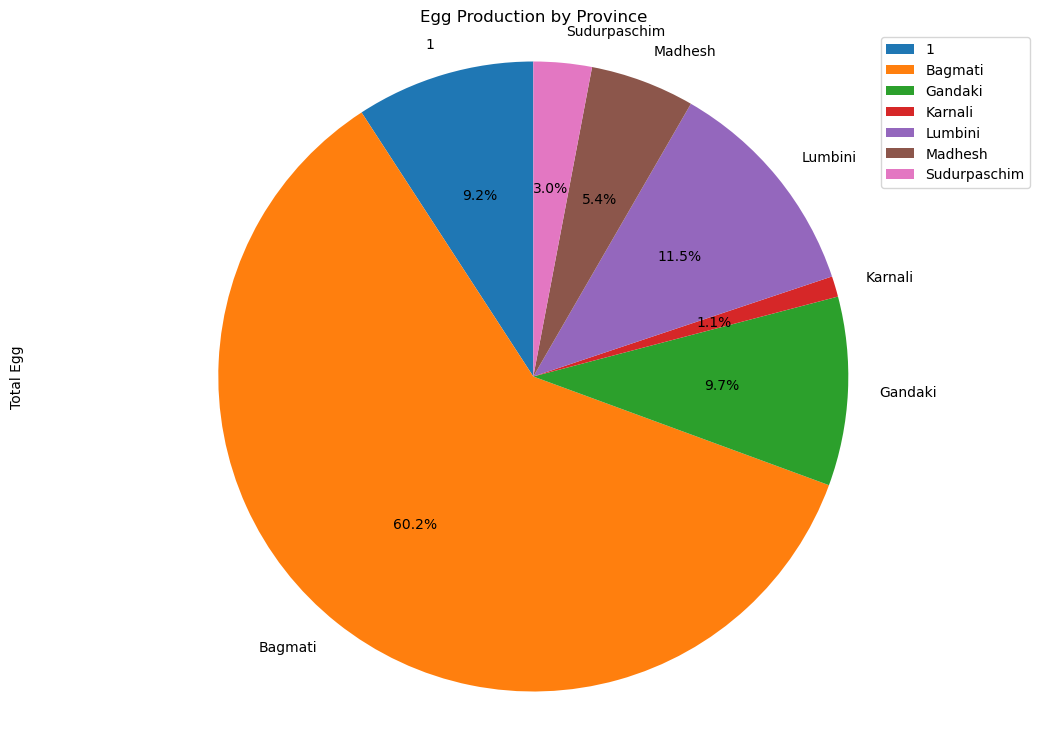

In [66]:
province_totals = eggProd.groupby('Province')['Total Egg'].sum()
province_totals.plot(kind='pie', figsize=(13, 9), autopct='%1.1f%%', startangle=90)
plt.title('Egg Production by Province')
plt.axis('equal')
plt.legend(labels=province_totals.index, loc='upper right')
plt.show()


In [67]:
# Filter the districts where duck egg production is zero
filtered_duck_eggProd = eggProd[eggProd['Duck Egg'] == 0]

# Create a table with the district name, province name, and duck egg production
table = filtered_duck_eggProd[['District', 'Province', 'Duck Egg']]
table.columns = ['District Name', 'Province Name', 'Duck Egg Production']

# Display the table
print(table)

   District Name Province Name  Duck Egg Production
39        MANANG       Gandaki                    0
40       MUSTANG       Gandaki                    0
44       SYANGJA       Gandaki                    0


### Livestock population of 20 years

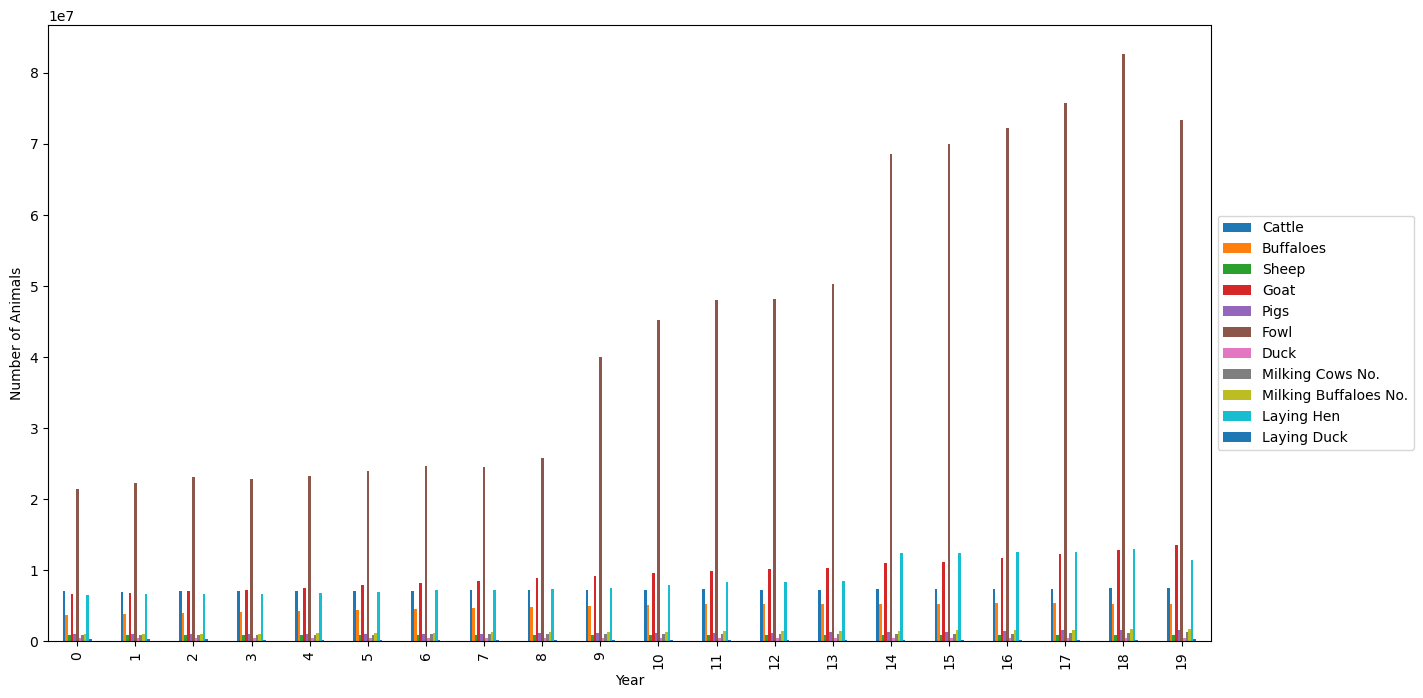

In [68]:
# plot the data as a bar graph
ax = livestock20yrs.plot(kind='bar', figsize=(15, 8))
ax.set_xlabel('Year')
ax.set_ylabel('Number of Animals')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# show the graph
plt.show()

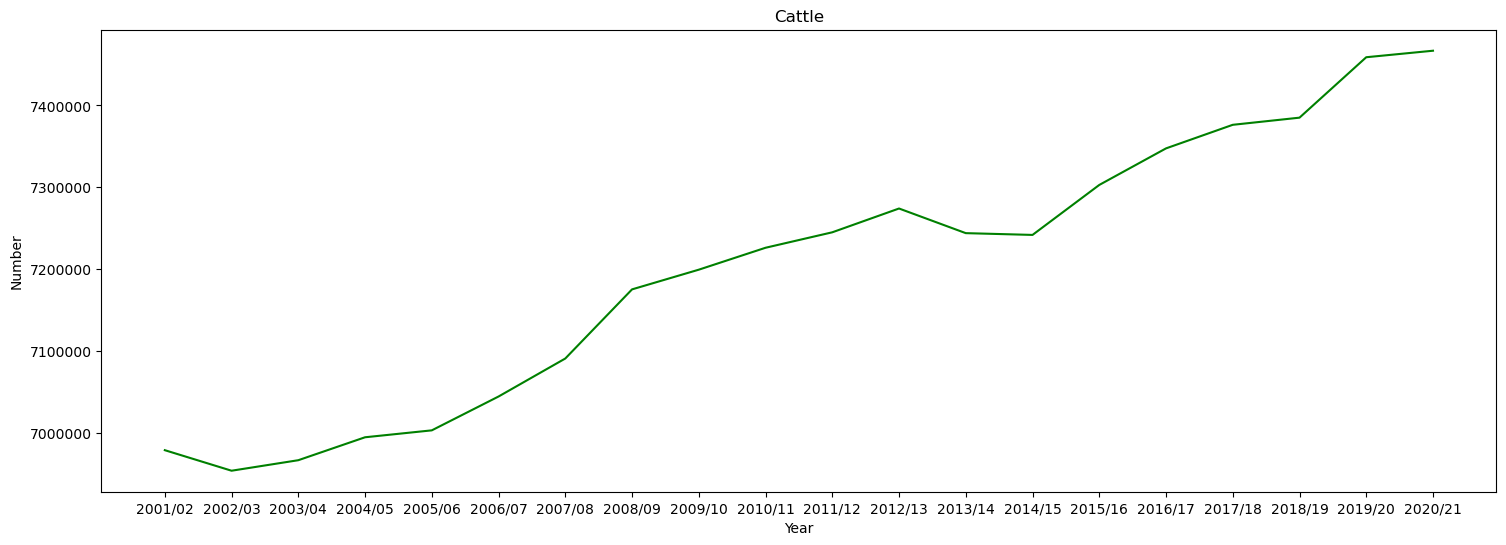

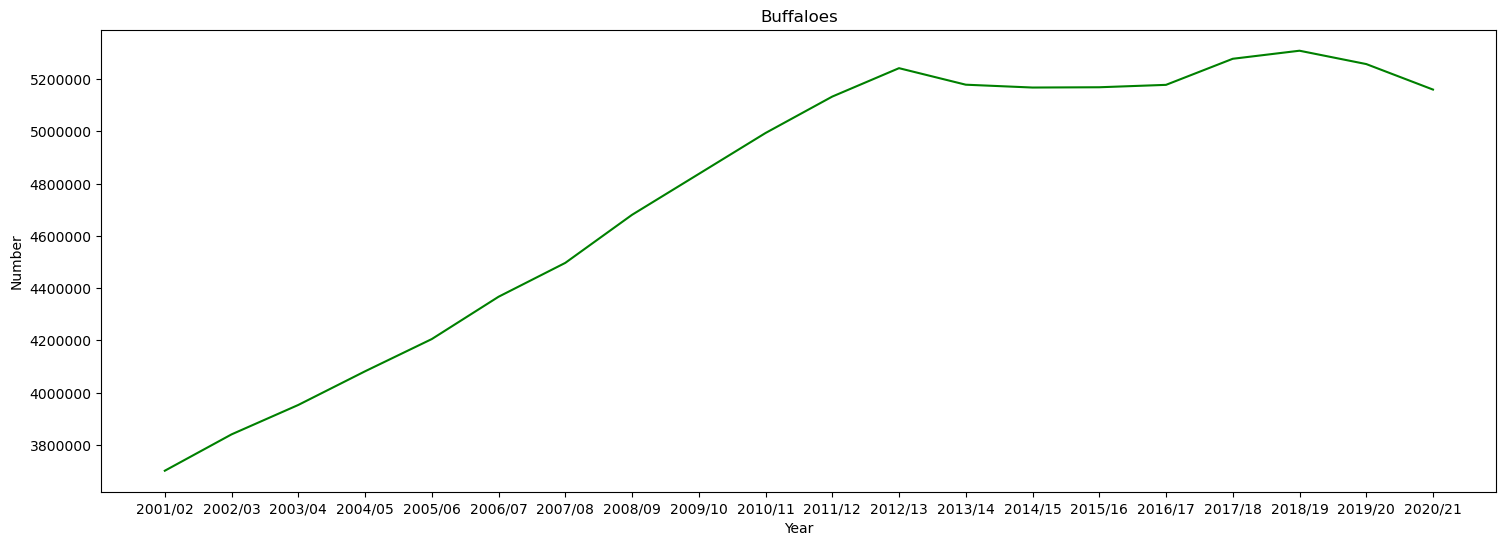

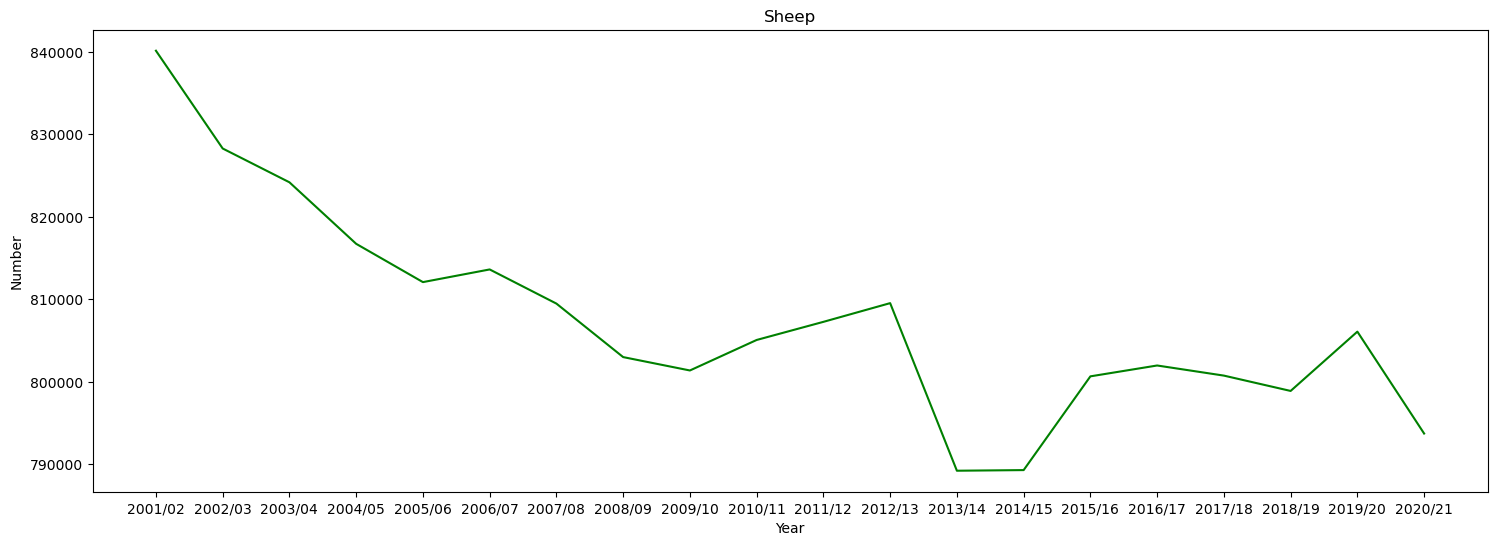

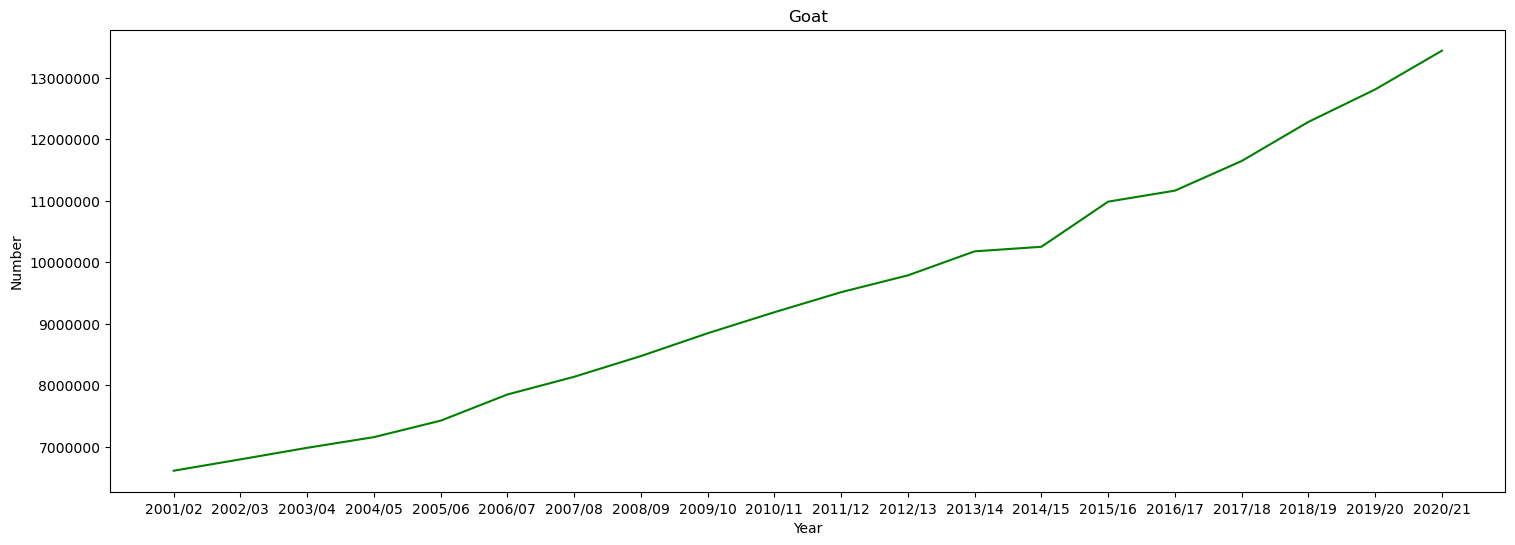

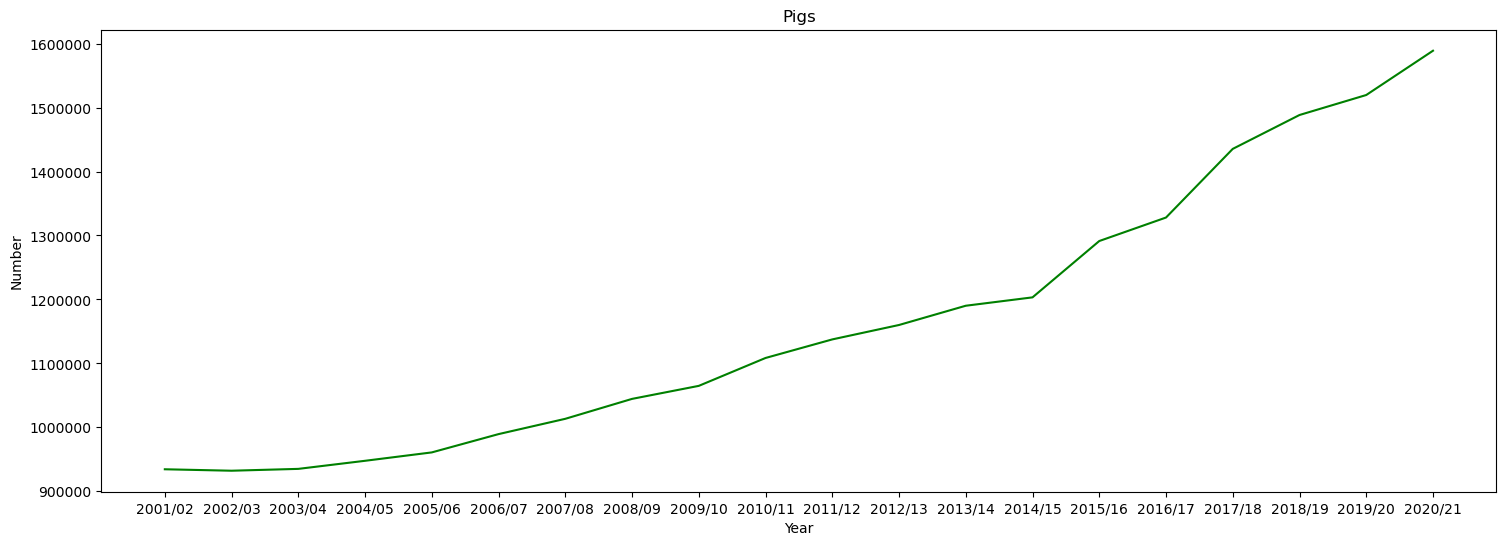

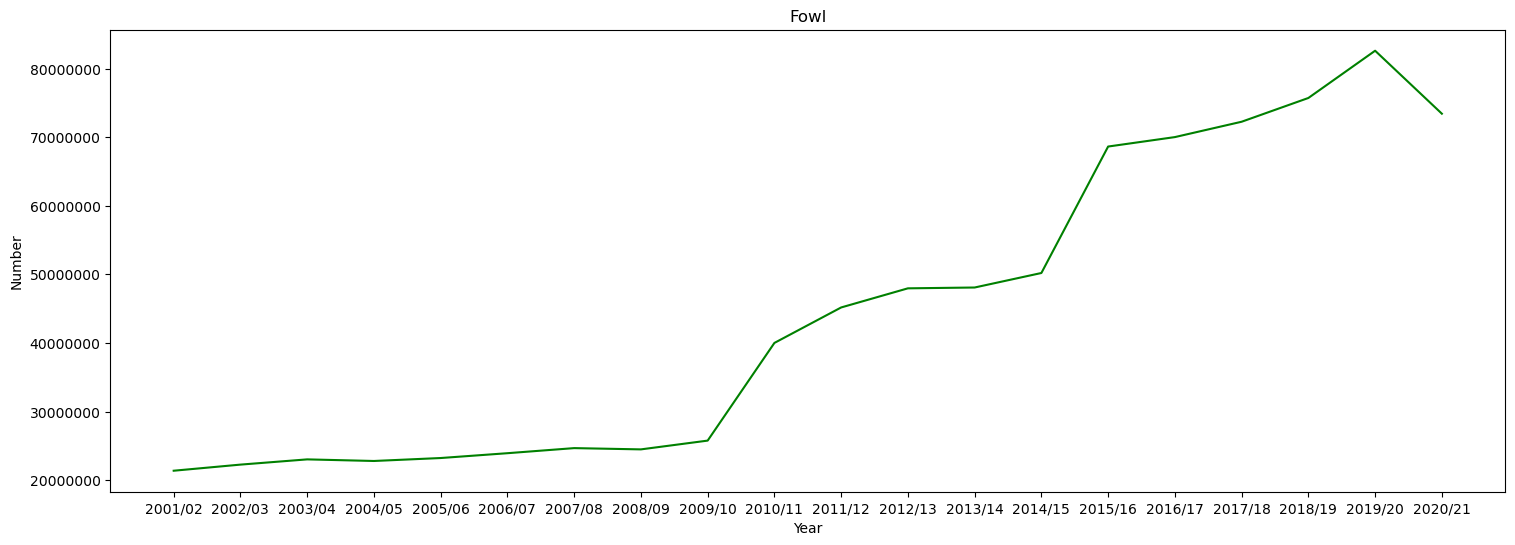

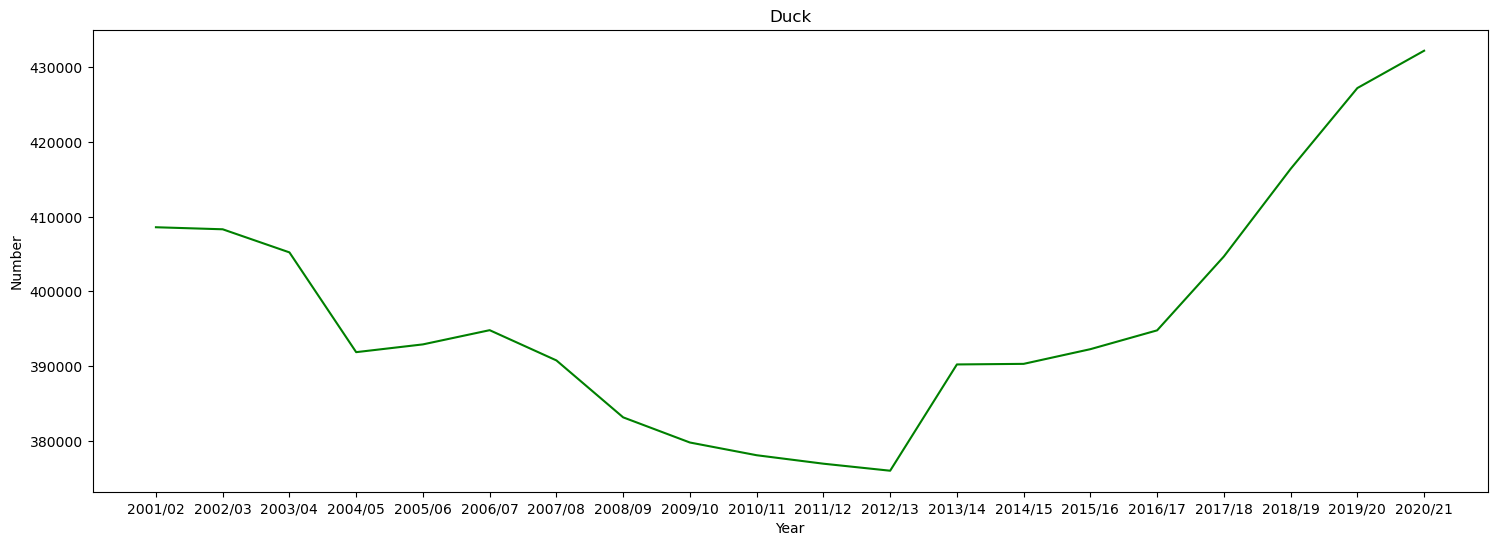

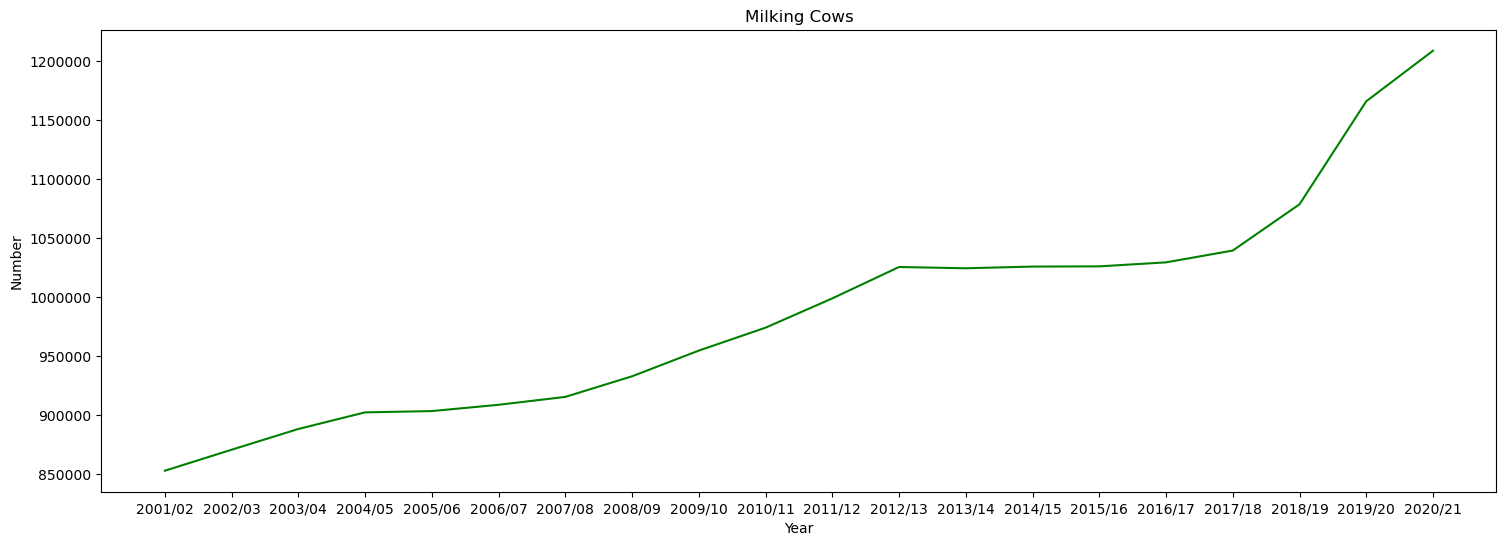

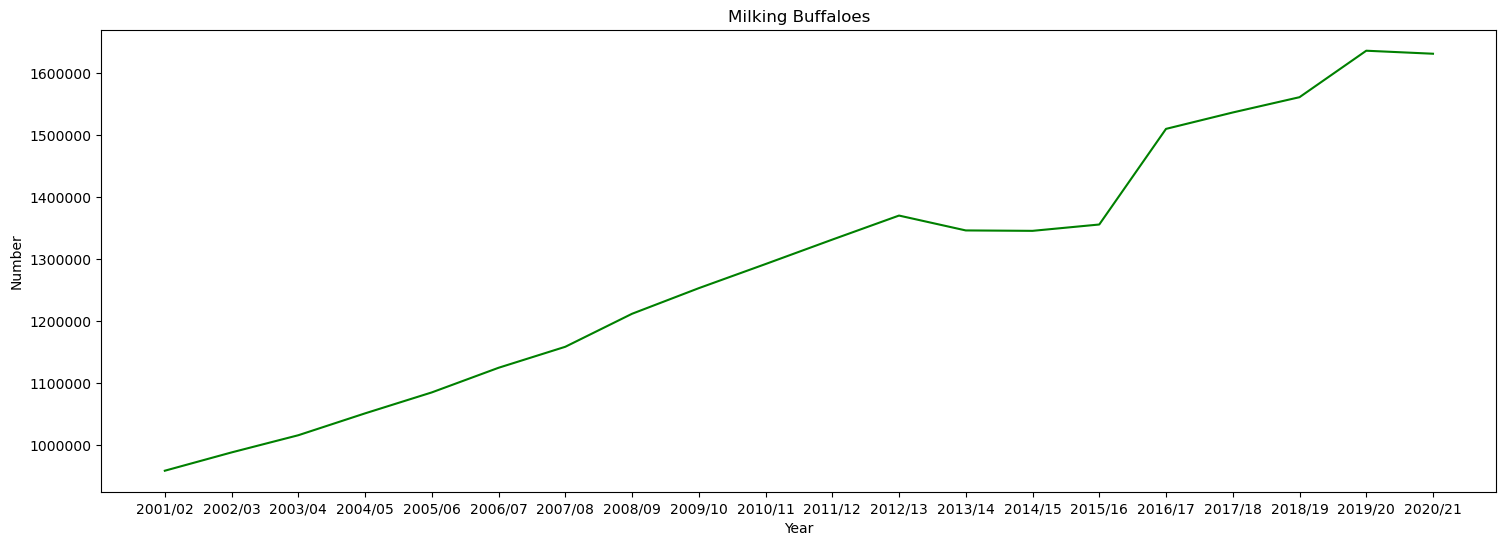

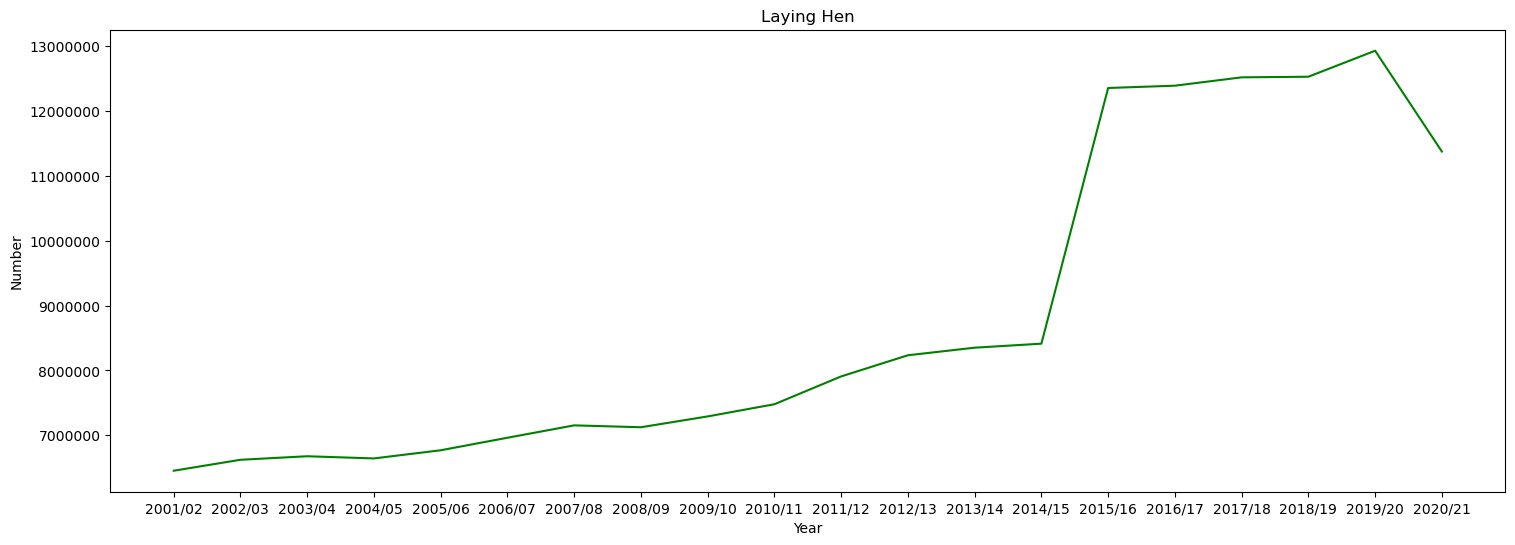

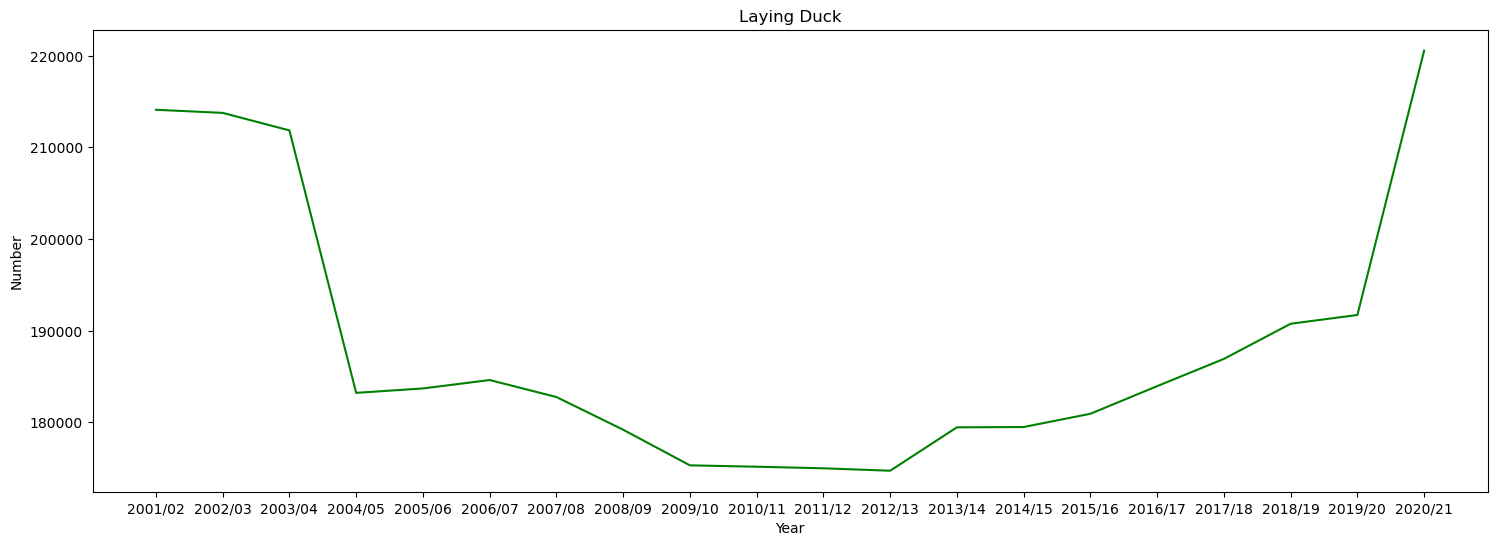

In [69]:
import mplcursors

animal_data = {'Cattle': 'Cattle', 'Buffaloes': 'Buffaloes', 'Sheep': 'Sheep', 'Goat': 'Goat',
               'Pigs': 'Pigs', 'Fowl': 'Fowl', 'Duck': 'Duck', 'Milking Cows': 'Milking Cows No.',
               'Milking Buffaloes': 'Milking Buffaloes No.', 'Laying Hen': 'Laying Hen',
               'Laying Duck': 'Laying Duck'}

# plot line charts for each animal
for animal, data_name in animal_data.items():
    data = livestock20yrs[['Year', data_name]]
    plt.figure(figsize=(18, 6))
    plt.plot(data['Year'], data[data_name],color='green')
    plt.title(animal)
    plt.xlabel('Year')
    plt.ylabel('Number')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    

In [70]:
import statsmodels.api as sm

# Define the time series sheep, fowl,duck
ts = livestock20yrs['Cattle']

# Fit the ARIMA model
model = sm.tsa.ARIMA(ts, order=(1,1,0)).fit()

# Make predictions for the next year
forecast = model.forecast(steps=1)

# Print the predicted number of animals for the next year
print("Predicted number of Cattle for the next year:", int(forecast))


Predicted number of Cattle for the next year: 7466814


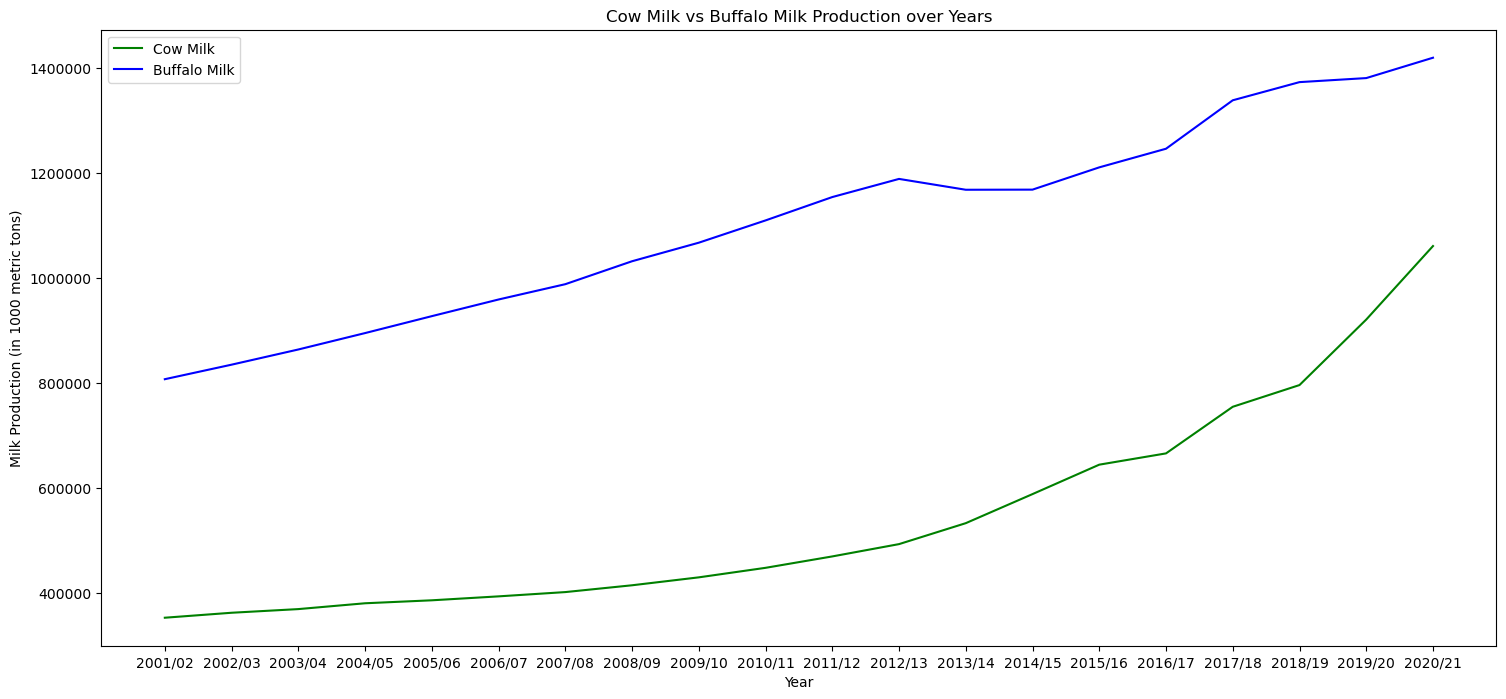

In [71]:
import matplotlib.pyplot as plt

# Plot cow milk and buffalo milk production over the years
plt.figure(figsize=(18,8))
plt.plot(prodLivestock20yrs['Year'], prodLivestock20yrs['Cow Milk'], label='Cow Milk', color='Green')
plt.plot(prodLivestock20yrs['Year'], prodLivestock20yrs['Buff Milk'], label='Buffalo Milk', color='blue')
plt.xlabel('Year')
plt.ylabel('Milk Production (in 1000 metric tons)')
plt.title('Cow Milk vs Buffalo Milk Production over Years')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.show()


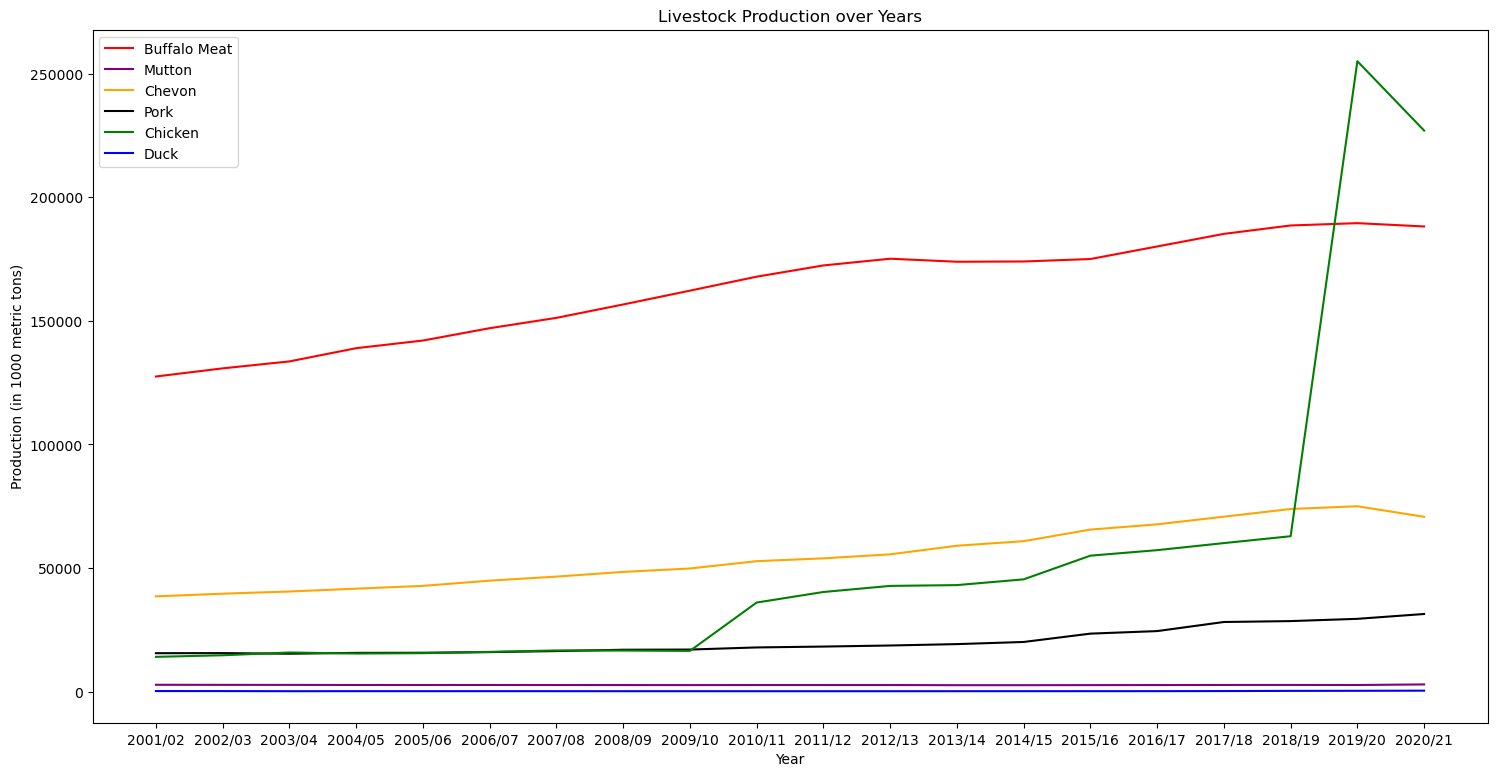

In [72]:
import matplotlib.pyplot as plt

# Plot cow milk and buffalo milk production over the years
plt.figure(figsize=(18,9))
plt.plot(prodLivestock20yrs['Year'], prodLivestock20yrs['Buff Meat'], label='Buffalo Meat', color='red')
plt.plot(prodLivestock20yrs['Year'], prodLivestock20yrs['Mutton'], label='Mutton', color='purple')
plt.plot(prodLivestock20yrs['Year'], prodLivestock20yrs['Chevon'], label='Chevon', color='orange')
plt.plot(prodLivestock20yrs['Year'], prodLivestock20yrs['Pork'], label='Pork', color='black')
plt.plot(prodLivestock20yrs['Year'], prodLivestock20yrs['Chicken'], label='Chicken', color='green')
plt.plot(prodLivestock20yrs['Year'], prodLivestock20yrs['Duck'], label='Duck', color='blue')

plt.xlabel('Year')
plt.ylabel('Production (in 1000 metric tons)')
plt.title('Livestock Production over Years')
plt.legend()

plt.show()


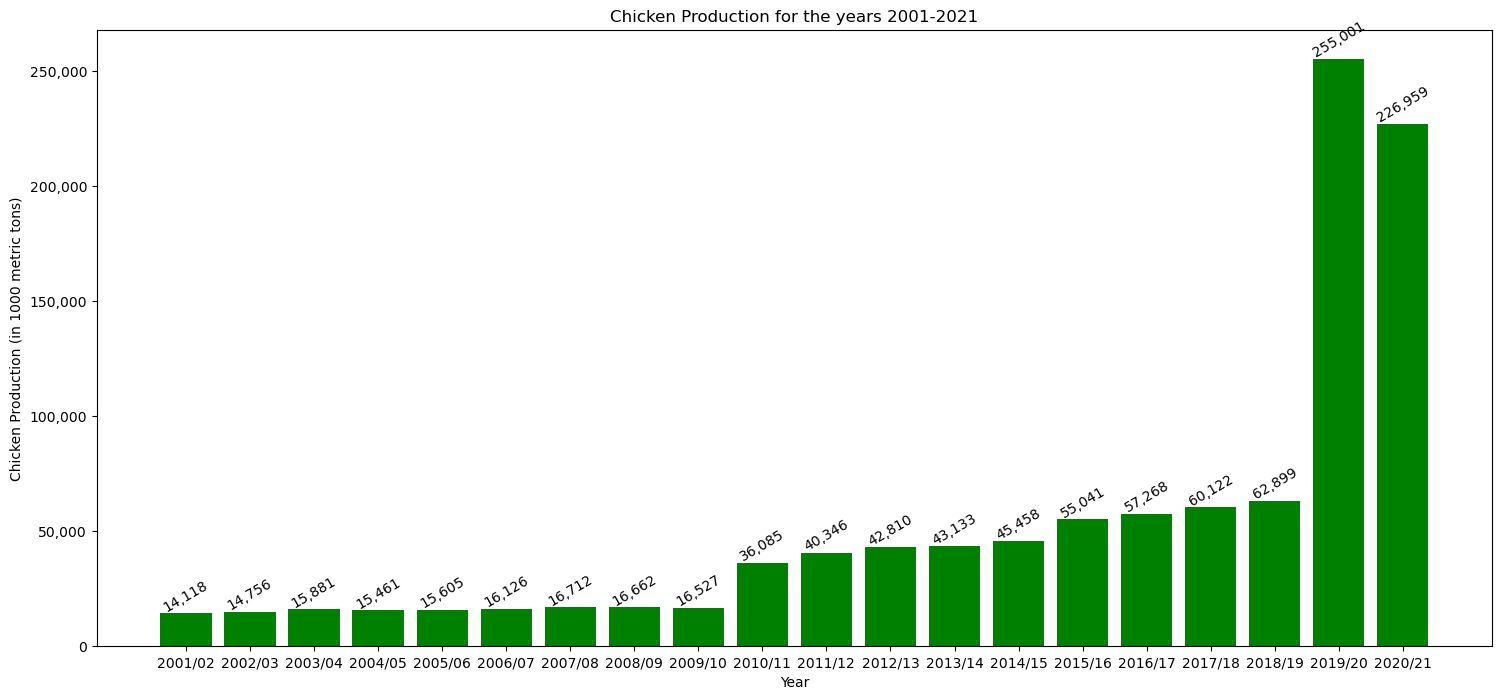

In [73]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Select data for livestock production
animal_data = prodLivestock20yrs.loc[:, ['Year', 'Chicken']]

# Filter data for year 2001-2021
animal_data = animal_data[animal_data['Year'].between('2001/02', '2020/21')]

# Create bar graph
fig, ax = plt.subplots(figsize=(18, 8))
ax.bar(animal_data['Year'], animal_data['Chicken'], color='green')
ax.set_xlabel('Year')
ax.set_ylabel('Chicken Production (in 1000 metric tons)')

# Format y-axis labels with commas
formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)

# Show value on top of each bar
for i, v in enumerate(animal_data['Chicken']):
    ax.text(i, v+1000, format(int(v), ','), ha='center', rotation=30)

ax.set_title('Chicken Production for the years 2001-2021')
plt.show()
